# Network Analysis of PhilGEPS: A Bipartite Analysis of Government Organization and Corporate Awardees

Kevin Anthony S. Sison*1 and Van Arloe M. Yu*1

1 Master of Science in Data Science, ASITE, Asian Institute of Management, Philippines

*Corresponding author: kssison@aim.edu, vayu@aim.edu


# Abstract

Procurement plays a critical role in the public sector. It is focused on supporting different units of the government to play their unique roles and serve citizens. Having an efficient and transparent procurement system is essential for any government organization to execute its initiatives like healthcare, education, and risk and disaster management.

This study intends to model the complex network of government organizations, corporations, and awarded projects using the historical records available in PhilGEPS. The study focuses on the Information Technology services which supports various types of government organization and have received increased focus in today’s age of modernization and digitization. These features were selected to reveal important or dominant corporations that serve the public sector. The study also looks into different time years from two different periods, 2014 and 2019, to analyze the changes of the Philippine procurement landscape.

Using a Bipartite Network Analysis, we were able to see the growth and change of the network from 2014 and 2019. We were also able to reveal specific companies who maintained their importance in the network after 5 years. We were also able to identify important actors in the projected networks of government organizations and corporate awardees. These insights can support decisions of the government in creating policies. Additionally, it can also be used by corporations to get insights on the needs of the government and evaluate their competition.

Based on these findings, we highly recommend the development of an open-source tool that can be added to the functionalities being provided by PhilGEPS. This network analysis tool can be integrated to their monitoring system and help improve transparency and efficiency in the government procurement system.

Keywords: Network Science, Complex Systems, Bipartite Network, Procurement, Government


# Introduction

In 2019, the Philippine Government Electronic Procurement System (PhilGEPS) recorded a total of 551 Billion Philippine Pesos in awarded contracts. This is equivalent to 15% of the total Philippine National Cash Budget for 2019 (PhilGEPS Open Data).

Procurement is central to the operations of all government organizations. It is used in healthcare like vaccines, drugs, and public hospitals. It is used in educational facilities including desks, chairs, and paper. It also includes core services like Information Technology services that are essential in the operations of many government organizations regardless of the nature of its role and services (About PhilGEPS).

The Philippine procurement system is often characterized by fraud and lack of transparency. Through the implementation of RA 9184, all National Government Agencies (NGAs), Government Owned and Controlled Corporations (GOCCs), Government Financial Institutions (GFIs), State Universities and Colleges (SUCS) including Local Government Units (LGUs) were mandated to use the PhilGEPS. PhilGEPS was created to address this issue and help improve the efficiency and transparency in the procurement function. It has proven to be a viable instrument in the public sector and has been accepted by the World Bank (WB) and the Asian Development Bank (ADB) (About PhilGEPS).

PhilGEPS is the centralized electronic portal that serves as the primary and definitive source of information on government procurement. The platform currently serves as an overall platform for E-Bidding and also hosts historical information on bids and awarded projects (About PhilGEPS).

However, with 1.16 million records in 2019 alone, there is a challenge to easily analyze and reveal patterns in the procurement system. With the goal of increasing transparency in the Philippine procurement system, we explored modeling the complex network of government organizations, corporations, and awarded projects using the historical records available in PhilGEPS. The study focuses on the Information Technology services which supports various types of government organization and have received increased focus in today’s age of modernization and digitization. These features were selected to reveal important or dominant corporations that serve the public sector. The study also looks into different time years from two different periods, 2014 and 2019, to analyze the changes of the Philippine procurement landscape coming from two different administrations. 


# Review of Related Literature

In the Netherlands, a bipartite network of corporations and government/state agencies was analyzed in 1978 by Mokken and Stokman. Their study revealed dominant industrial sectors like metals/shipbuilding and chemicals/oil. They also found that state agencies under economic affairs, and education and sciences have the most connections (Mokken and Stokman, 1978). 

Network theory was also applied to analysing public-private partnership projects (PPP). Through network analysis, Chowdhury et al. identified the core-peripheral stakeholders, the interdependence of influential intermediary participants, the effect of the structure of the PPP on its outcome. They constructed a bipartite network of the related parties of the PPP agreements and the contracts/agreements. The edge would be constructed by connecting an agreement and a stakeholder of the PPP. Analysis of the projected network of stakeholders reveals that the node or stakeholder with the highest degree is the most influential stakeholder. The most influential stakeholder also had the highest betweenness centrality showing that this stakeholder has greater access to information and can efficiently communicate with others. The study was able to identify the position, power and influence of each stakeholder. The power of a stakeholder is not an individual attribute but it stems from the relationships with other stakeholders in the network (Chowdhury et al., 2011).

The group of Yau et al. performed social network analysis (SNA) to explore the network of educational institutions and industrial partners for the grants awarded by the National Sciences and Engineering Research Council of Canada between 2000 to 2010. The group constructed two mode networks for 2000-2005 and 2006-2010, and one mode networks of institutions based on shared partners and one mode networks of partners based on shared institutions. They examined the different centrality measures (authority, hub, total degree, and eigenvector) for the one mode network of institutions. They found the University of British Columbia to be one of the most central research institutions based on the research it shares with the other universities. Similarly, they found that analyzing the one mode network of research subjects that the different centrality measures reflect the dominant research area for a given year. Their social network analysis has shown how funding in research addresses the current needs and how it reflects the need for better oversight of the process. Social network analysis is therefore a useful tool in enforcing good governance (Yau et al., 2012). 

Another application of network theory is examining how corruption can distort markets and how it affects the structure of public contracting markets. The study of Fazekas et al., modelled public contracting networks using buyers and suppliers as nodes. They applied their analysis on two similarly corrupt countries the Czech republic and Hungary. They found that a buyer that is flagged as corrupt has 10% fewer suppliers and that the most corrupt buyers alter their networks by 21-38% with government turnovers. 

Bipartite networks were also applied in analyzing behavior in design crowdsourcing. One set of nodes for the participants, another set of nodes for design contests. This paper by Chaudhari et al., found that the fraction of total prize allocated to the first prize negatively affects participation. They also modeled contest popularity using the alternating k-star network statistic.


# Loading Libraries and Datasets

## Import Libraries

In [1]:
#Import all the necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community
import collections
from networkx.algorithms import bipartite
import seaborn as sns

## Loading Datasets

Procurement data was downloaded from the PhilGEPS website (PhilGEPS Open Data). The data was collected for January to December 2014, and January to December 2019. The initial dataframe was filtered to include only  Information Technology as the Business Category. A new dataframe was constructed to include only 1) The Organization Name - the name of the government/state agency that needs the project. 2) The Notice Title- the name or a brief description of the project. 3) The Awardee Corporate Title- the name of the company that won the contract., and 4) The Contract Amount. 

### 2014 Datasets

Using the Bid and Award Details for 2014. Data was downloaded from: https://www.philgeps.gov.ph/opendataSRD.html. The data was collected for January to December 2014.

In [2]:
df1_2014 = pd.read_excel('Bid Notice and Award Details Jan-Mar 2014.xlsx',header=3)

In [3]:
df2_2014 = pd.read_excel('Bid Notice and Award Details Apr-June 2014.xlsx',header=3)

In [4]:
df3_2014 = pd.read_excel('Bid Notice and Award Details July-Sept 2014.xlsx',header=3)

In [5]:
df4_2014 = pd.read_excel('Bid Notice and Award Details Oct-Dec 2014.xlsx',header=3)

The dataframes were combined to a new dataframe `df`

In [6]:
df_2014 = pd.concat([df1_2014, df2_2014, df3_2014, df4_2014], ignore_index=True)

In [7]:
df_2014.columns

Index(['Organization Name', 'Reference ID', 'Solicitation No.', 'Notice Title',
       'Publish Date', 'Classification', 'Notice Type', 'Business Category',
       'Funding Source', 'Funding Instrument', 'Procurement Mode',
       'Trade Agreement', 'Approved Budget of the Contract',
       'Area of Delivery', 'Contract Duration', 'Calendar Type',
       'Line Item No', 'Item Name', 'Item Desc', 'Quantity', 'UOM',
       'Item Budget', 'PreBid Date', 'Closing Date', 'Notice Status',
       'Award No.', 'Award Title', 'Award Type', 'UNSPSC Code',
       'UNSPSC Description', 'Awardee Corporate Title', 'Contract Amount',
       'Contract No', 'Publish Date(Award)', 'Award Date',
       'Notice to Proceed Date', 'Contract Efectivity Date',
       'Contract End Date', 'Reason for Award', 'Award Status'],
      dtype='object')

In [8]:
df_2014.head(5)

Organization Name Reference ID  \
0  CITY OF SAN CARLOS, NEGROS OCCIDENTAL      2504181   
1  CITY OF SAN CARLOS, NEGROS OCCIDENTAL      2504189   
2  CITY OF SAN CARLOS, NEGROS OCCIDENTAL      2504193   
3  CITY OF SAN CARLOS, NEGROS OCCIDENTAL      2504196   
4  CITY OF SAN CARLOS, NEGROS OCCIDENTAL      2504202   

                             Solicitation No.  \
0                      PR 18-13-12-1989 - CED   
1              PR 1-13-12-1994 - CMO (CDRRMO)   
2  PR 1-13-11-1946 - CMO (CDRRMO) (REBIDDING)   
3                       PR 1-13-05-0890 - CED   
4                       PR 4-13-12-1976 - CWD   

                                        Notice Title Publish Date  \
0  PR 18-13-12-1989, FOR USE IN THE CONSTRUCTION ...   2014-01-01   
1  PR 1-13-12-1994, TO BE USED BY THE EMERGENCY M...   2014-01-01   
2  PR 1-13-11-1946, TO BE USED BY THE CITY DISAST...   2014-01-01   
3  PR 1-13-05-0890, FOR USE IN THE IMPROVEMENT AL...   2014-01-01   
4  PR 4-13-12-1976, FOR USE OF GENERATING SET 175...   2014-01-01   

  Classification              Notice Type  \
0          Goods  Invitation to Bid (ITB)   
1          Goods  Invitation to Bid (ITB)   
2          Goods  Invitation to Bid (ITB)   
3          Goods  Invitation to Bid (ITB)   
4          Goods  Invitation to Bid (ITB)   

                                   Business Category  \
0                Construction Materials and Supplies   
1        Fire Fighting & Rescue and Safety Equipment   
2  Information Technology Parts & Accessories & P...   
3  Fuels/Fuel Additives & Lubricants & Anti Corro...   
4                    Electronic Parts and Components   

                        Funding Source  \
0  Government of the Philippines (GOP)   
1  Government of the Philippines (GOP)   
2  Government of the Philippines (GOP)   
3  Government of the Philippines (GOP)   
4  Government of the Philippines (GOP)   

                                  Funding Instrument  ...  \
0  Budget for the Contract Approved by the Sanggu...  ...   
1  Budget for the Contract Approved by the Sanggu...  ...   
2  Budget for the Contract Approved by the Sanggu...  ...   
3  Budget for the Contract Approved by the Sanggu...  ...   
4  Budget for the Contract Approved by the Sanggu...  ...   

  Awardee Corporate Title Contract Amount  Contract No Publish Date(Award)  \
0                     NaN             NaN          NaN                 NaT   
1                     NaN             NaN          NaN                 NaT   
2                     NaN             NaN          NaN                 NaT   
3                     NaN             NaN          NaN                 NaT   
4                     NaN             NaN          NaN                 NaT   

   Award Date Notice to Proceed Date  Contract Efectivity Date  \
0         NaT                    NaT                       NaT   
1         NaT                    NaT                       NaT   
2         NaT                    NaT                       NaT   
3         NaT                    NaT                       NaT   
4         NaT                    NaT                       NaT   

  Contract End Date Reason for Award  Award Status  
0               NaT              NaN           NaN  
1               NaT              NaN           NaN  
2               NaT              NaN           NaN  
3               NaT              NaN           NaN  
4               NaT              NaN           NaN  

[5 rows x 40 columns]

To check if the dataframes combined properly

In [9]:
df1_2014.shape[0]+df2_2014.shape[0]+df3_2014.shape[0]+df4_2014.shape[0]-df_2014.shape[0]

0

### 2019 Datasets

Using the Bid and Award Details for 2019. Data was downloaded from: https://www.philgeps.gov.ph/opendataSRD.html. The data was collected for January to December 2019.

In [5]:
df1_2019 = pd.read_excel('Bid Notice and Award Details Jan-Mar 2019.xlsx',header=3)

In [6]:
df2_2019 = pd.read_excel('Bid Notice and Award Details Apr-Jun 2019.xlsx',header=3)

In [7]:
df3_2019 = pd.read_excel('Bid Notice and Award Details July-Sept 2019.xlsx',header=3)

In [8]:
df4_2019 = pd.read_excel('Bid Notice and Award Details Oct-Dec 2019.xlsx',header=3)

The dataframes were combined to a new dataframe `df`

In [9]:
df_2019 = pd.concat([df1_2019, df2_2019, df3_2019, df4_2019], ignore_index=True)

In [10]:
df_2019.columns

Index(['Organization Name', 'Reference ID', 'Solicitation No.', 'Notice Title',
       'Publish Date', 'Classification', 'Notice Type', 'Business Category',
       'Funding Source', 'Funding Instrument', 'Procurement Mode',
       'Trade Agreement', 'Approved Budget of the Contract',
       'Area of Delivery', 'Contract Duration', 'Calendar Type',
       'Line Item No', 'Item Name', 'Item Desc', 'Quantity', 'UOM',
       'Item Budget', 'PreBid Date', 'Closing Date', 'Notice Status',
       'Award No.', 'Award Title', 'Award Type', 'UNSPSC Code',
       'UNSPSC Description', 'Awardee Corporate Title', 'Contract Amount',
       'Contract No', 'Publish Date(Award)', 'Award Date',
       'Notice to Proceed Date', 'Contract Efectivity Date',
       'Contract End Date', 'Reason for Award', 'Award Status'],
      dtype='object')

In [11]:
df_2019.head(5)

Organization Name  Reference ID             Solicitation No.  \
0  DEPARTMENT OF EDUCATION - ARMM       5934798  DEPED ARMM ASECSPP-434-2018   
1         BARANGAY 8, LUCENA CITY       5937639                         2018   
2                  CITY OF ILOILO       5937646                   18-12-0872   
3       PROVINCE OF EASTERN SAMAR       5937908                 2018-12-0559   
4       PROVINCE OF EASTERN SAMAR       5937983                 2018-12-0560   

                                        Notice Title Publish Date  \
0  Procurement of Garden Kits (tools and seeds) i...   2019-01-01   
1  Purchase of Food for Senior Citizen Gen. Assembly   2019-01-01   
2  SUPPLY AND DELIVERY OF MULTI-PURPOSE VEHICLE (...   2019-01-01   
3  2018-12-0559 - INVITATION TO BID FOR  IMPROVEM...   2019-01-01   
4  2018-12-0560 - INVITATION TO BID FOR  CONSTRUC...   2019-01-01   

  Classification                  Notice Type  \
0          Goods  Request for Quotation (RFQ)   
1          Goods  Request for Quotation (RFQ)   
2          Goods      Invitation to Bid (ITB)   
3    Civil Works      Invitation to Bid (ITB)   
4    Civil Works      Invitation to Bid (ITB)   

                                   Business Category  \
0  Agricultural Products (Seeds, Seedlings, Plant...   
1                                  Catering Services   
2                                           Vehicles   
3                              Construction Projects   
4                              Construction Projects   

                        Funding Source  \
0  Government of the Philippines (GOP)   
1  Government of the Philippines (GOP)   
2  Government of the Philippines (GOP)   
3  Government of the Philippines (GOP)   
4  Government of the Philippines (GOP)   

                                  Funding Instrument  ...  \
0                         General Appropriations Act  ...   
1  Budget for the Contract Approved by the Sanggu...  ...   
2  Budget for the Contract Approved by the Sanggu...  ...   
3  Budget for the Contract Approved by the Sanggu...  ...   
4  Budget for the Contract Approved by the Sanggu...  ...   

  Awardee Corporate Title Contract Amount  \
0                     NaN             NaN   
1                     NaN             NaN   
2                     NaN             NaN   
3            YFL BUILDERS       1974402.0   
4    5 STAR J ENTERPRISES       1993625.2   

                                         Contract No     Publish Date(Award)  \
0                                                NaN                     NaT   
1                                                NaN                     NaT   
2                                                NaN                     NaT   
3  2018-12-0559 - INVITATION TO BID FOR IMPROVEME... 2019-02-27 15:23:44.163   
4  2018-12-0560 - INVITATION TO BID FOR CONSTRUCT... 2019-02-27 15:01:07.757   

   Award Date Notice to Proceed Date  Contract Efectivity Date  \
0         NaT                    NaT                       NaT   
1         NaT                    NaT                       NaT   
2         NaT                    NaT                       NaT   
3  2019-02-06    2019-02-08 01:00:00       2019-02-09 01:00:00   
4  2019-02-06    2019-02-08 01:00:00       2019-02-09 01:00:00   

    Contract End Date                   Reason for Award  Award Status  
0                 NaT                                NaN           NaN  
1                 NaT                                NaN           NaN  
2                 NaT                                NaN           NaN  
3 2019-03-25 01:00:00  Lowest Calculated Responsive Bid        Updated  
4 2019-03-30 01:00:00   Lowest Calculated Responsive Bid       Updated  

[5 rows x 40 columns]

To check if the dataframes combined properly

In [12]:
df1_2019.shape[0]+df2_2019.shape[0]+df3_2019.shape[0]+df4_2019.shape[0]-df_2019.shape[0]

0

# Exploratory Data Analysis

Most of the contracts awarded in 2014 and 2019 were funded by the General Appropriations Act. It would be interesting to note that the number of contracts that were procured by Requesting for Quotation almost doubled from 2014 to 2019 while those that were awarded from Invitation to Bid has increased only by around 30%.  

## 2014 Exploratory Data Analysis

### Funding Instrument Distribution Plot

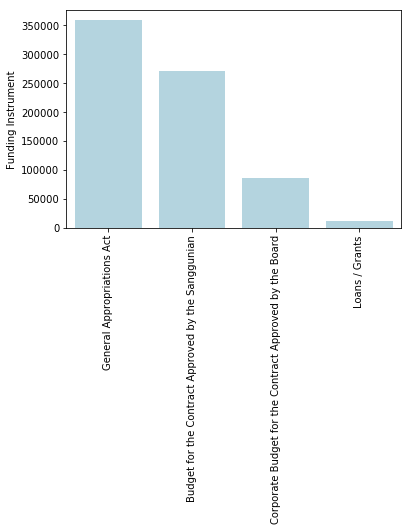

In [97]:
top = df_2014['Funding Instrument'].value_counts()
chart = sns.barplot(top.index, top, color='lightblue');
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Notice Type Distribution Plot

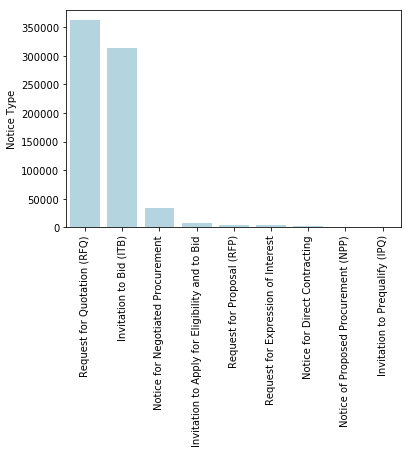

In [95]:
top = df_2014['Notice Type'].value_counts()
chart = sns.barplot(top.index, top, color='lightblue');
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Reason for Award Distribution Plot

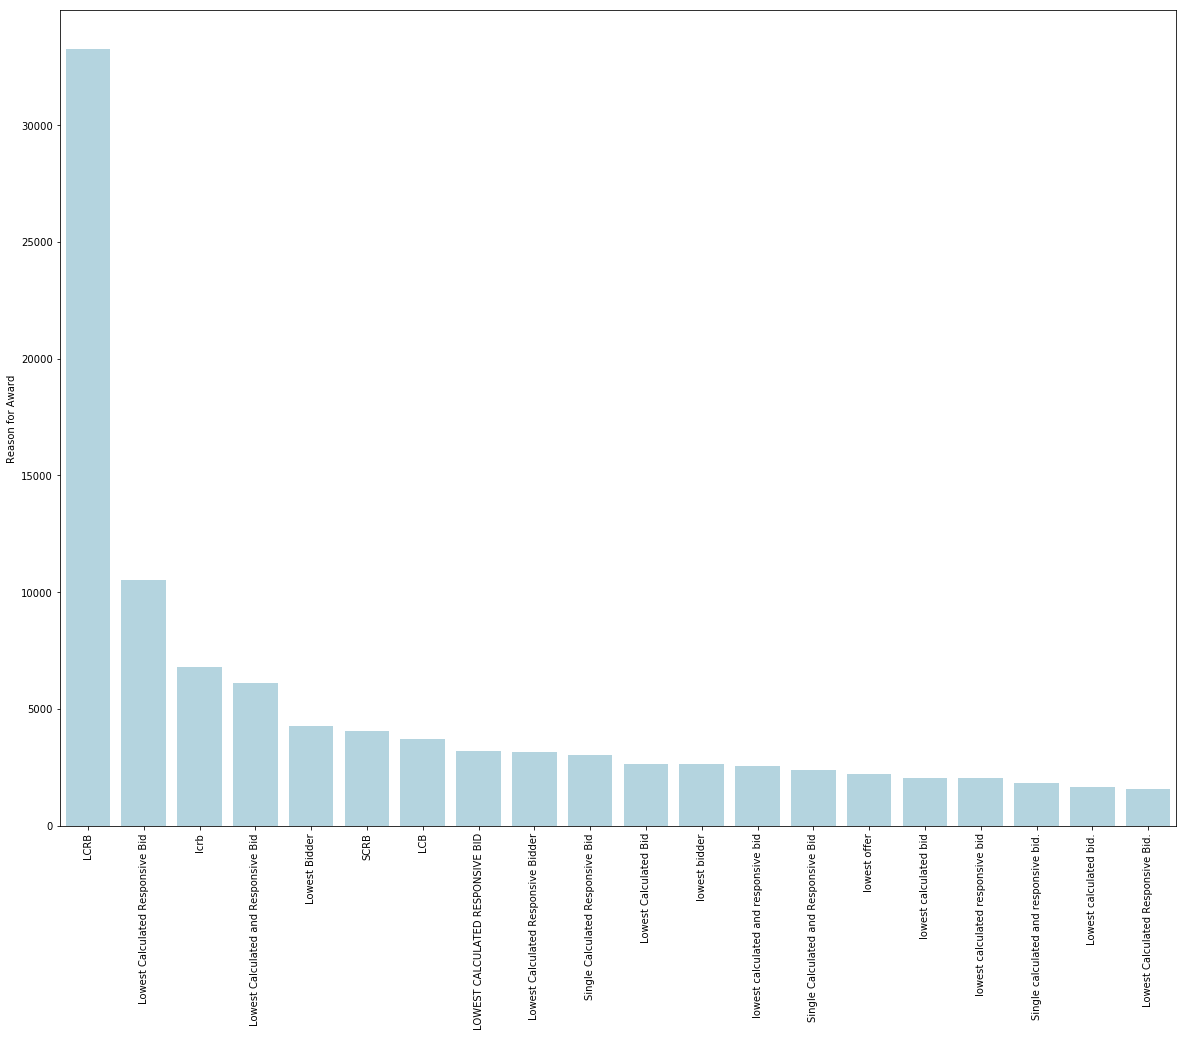

In [96]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
top = df_2014['Reason for Award'].value_counts().head(20)
chart = sns.barplot(top.index, top, color='lightblue');
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);


### Business Category Distribution Plot

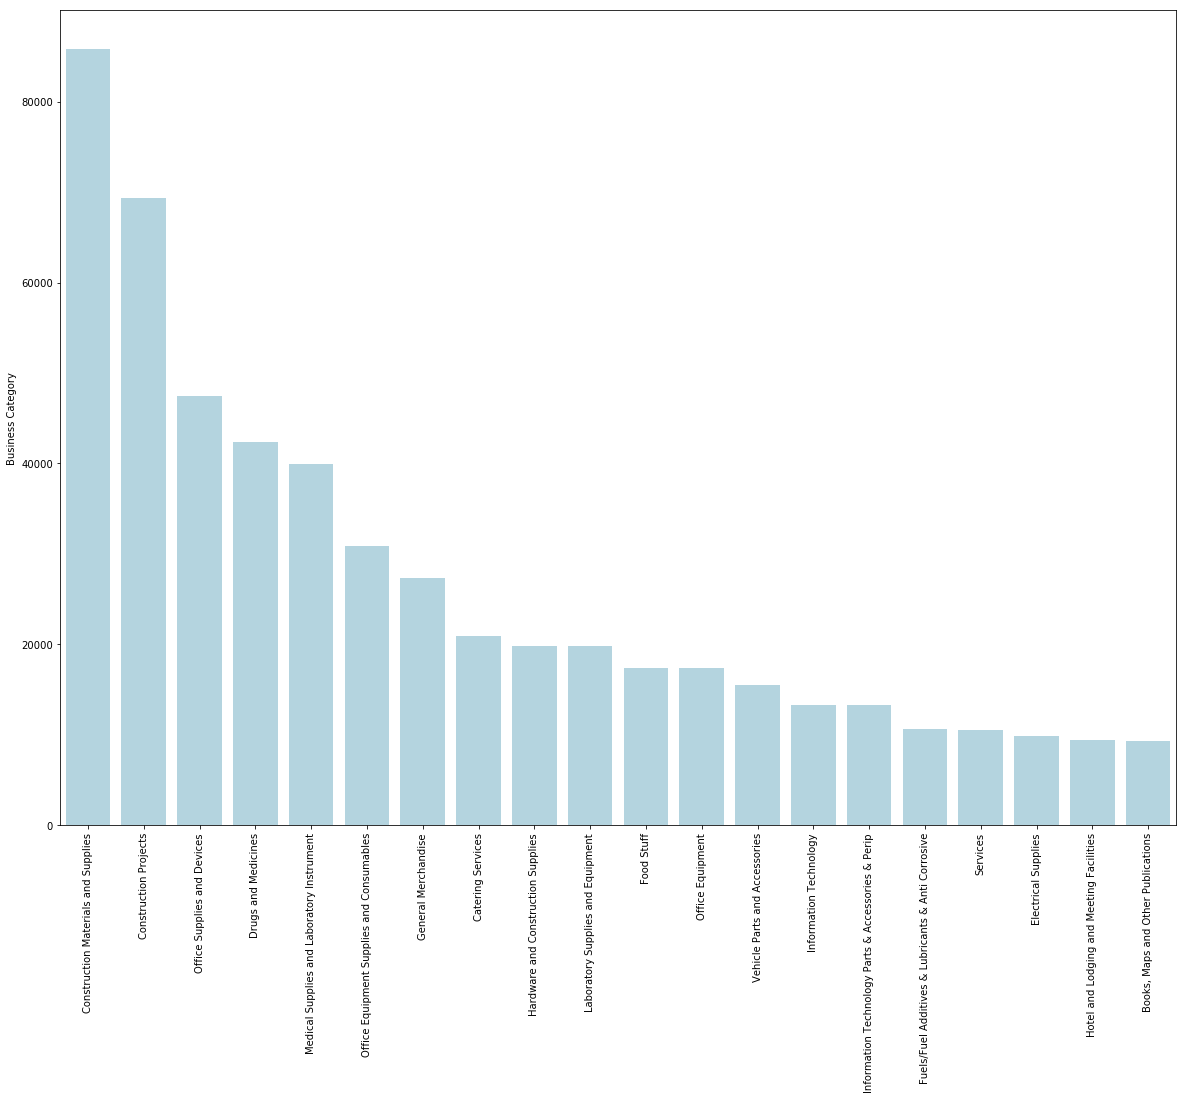

In [98]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
top = df_2014['Business Category'].value_counts().head(20)
chart = sns.barplot(top.index, top, color='lightblue');
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);


### Contract Amount by Notice Type Boxplot

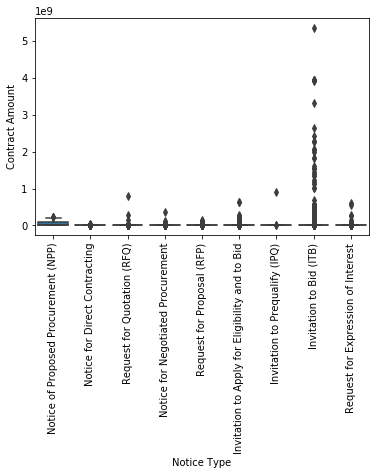

In [14]:
sorted_nb = df_2014.groupby(['Notice Type'])['Contract Amount'].median().sort_values()
chart = sns.boxplot(x=df_2014['Notice Type'], y=df_2014['Contract Amount'], order=list(sorted_nb.index))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Contract Amount by Business Category Boxplot

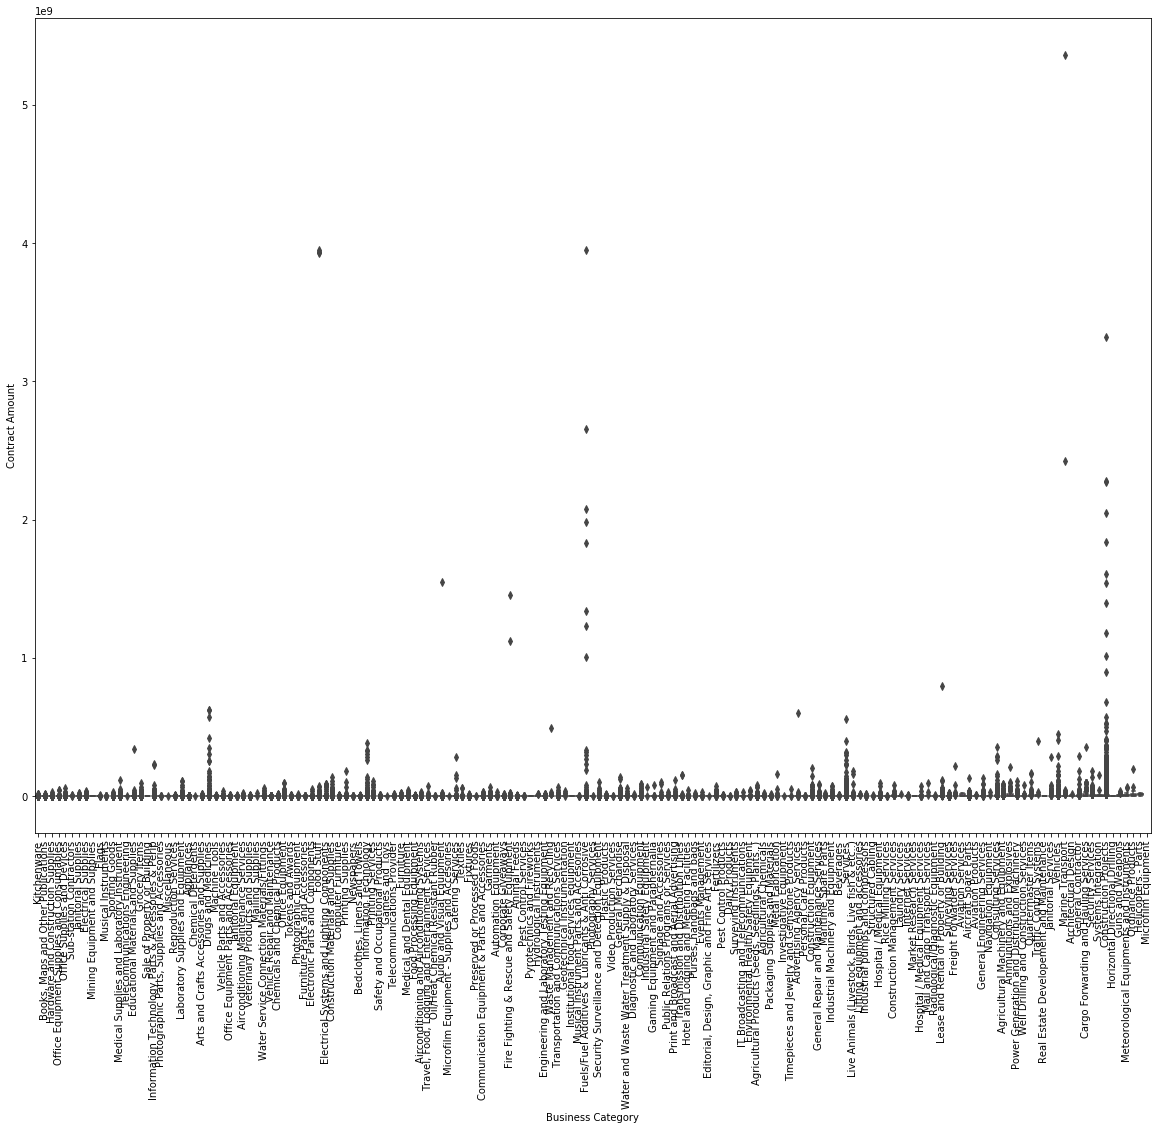

In [15]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sorted_nb = df_2014.groupby(['Business Category'])['Contract Amount'].median().sort_values()
chart = sns.boxplot(x=df_2014['Business Category'], y=df_2014['Contract Amount'], ax=ax, order=list(sorted_nb.index))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Contract Amount vs Approved Budget of the Contract Jointplot

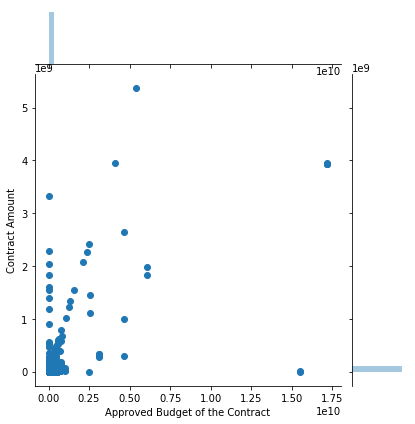

In [16]:
sns.jointplot(x=df_2014['Approved Budget of the Contract'], y=df_2014['Contract Amount']);

## 2019 Exploratory Data Analysis

### Funding Instrument Distribution Plot

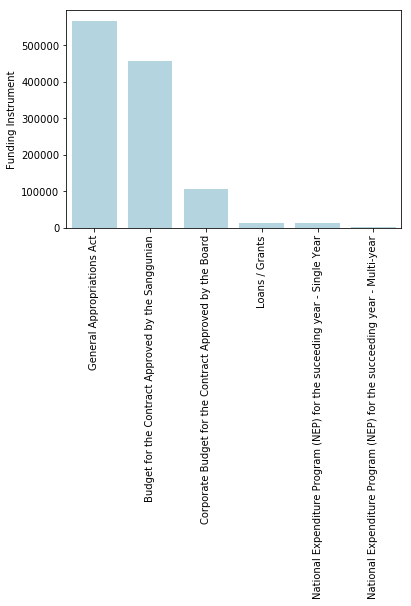

In [89]:
top = df_2019['Funding Instrument'].value_counts()
chart = sns.barplot(top.index, top, color='lightblue');
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Notice Type Distribution Plot

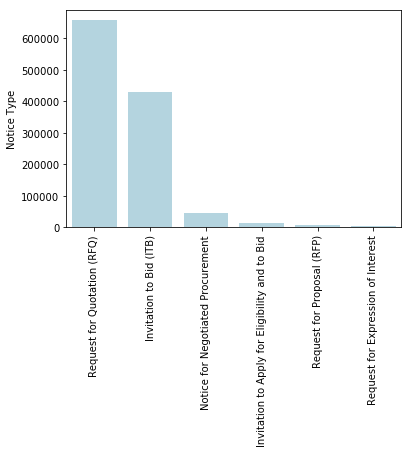

In [90]:
top = df_2019['Notice Type'].value_counts()
chart = sns.barplot(top.index, top, color='lightblue');
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Reason for Award Distribution Plot

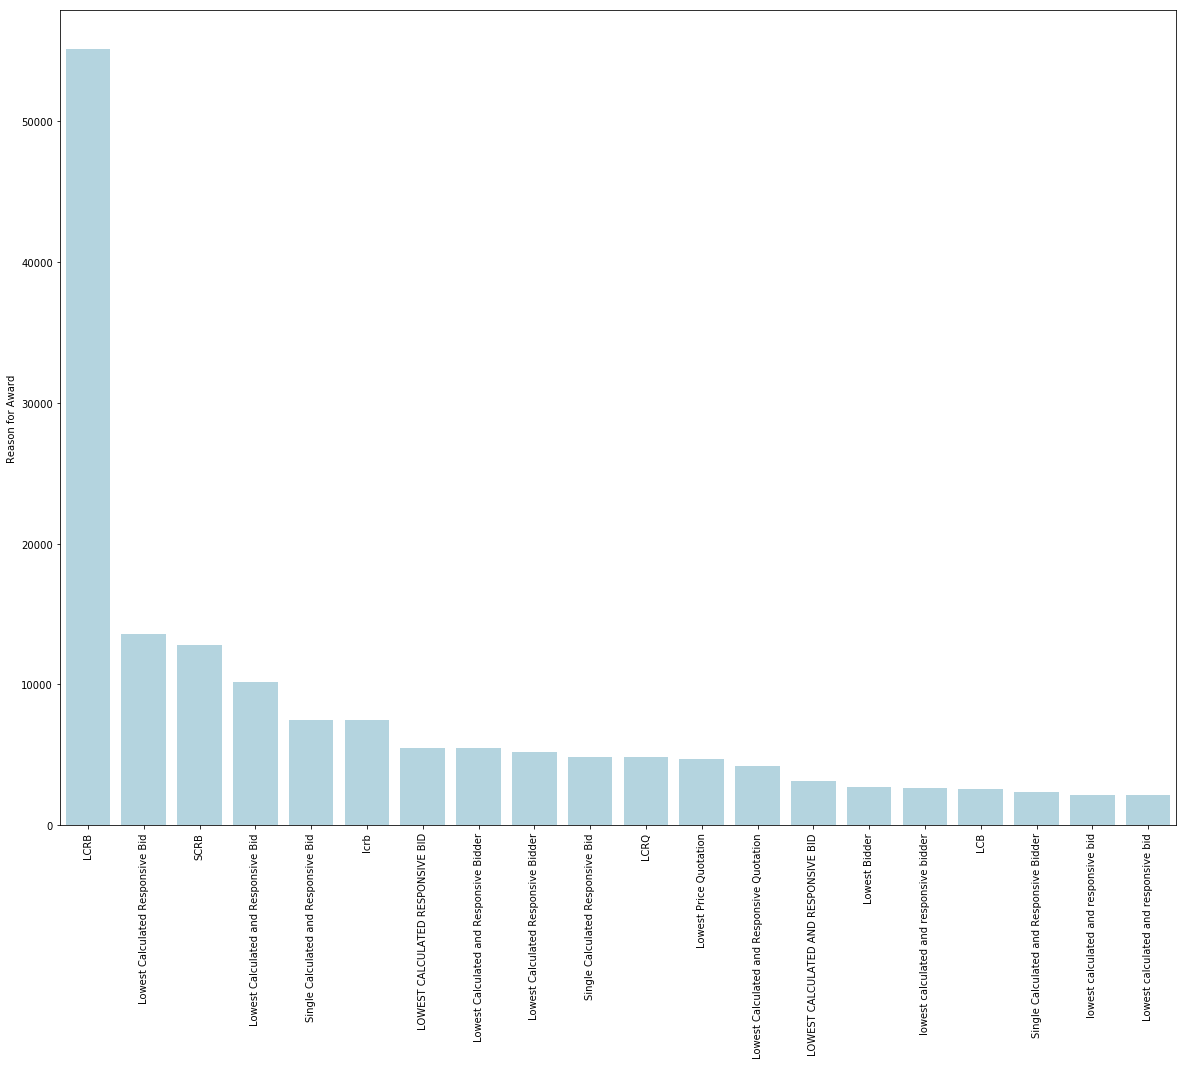

In [91]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
top = df_2019['Reason for Award'].value_counts().head(20)
chart = sns.barplot(top.index, top, color='lightblue');
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);


### Business Category Distribution Plot

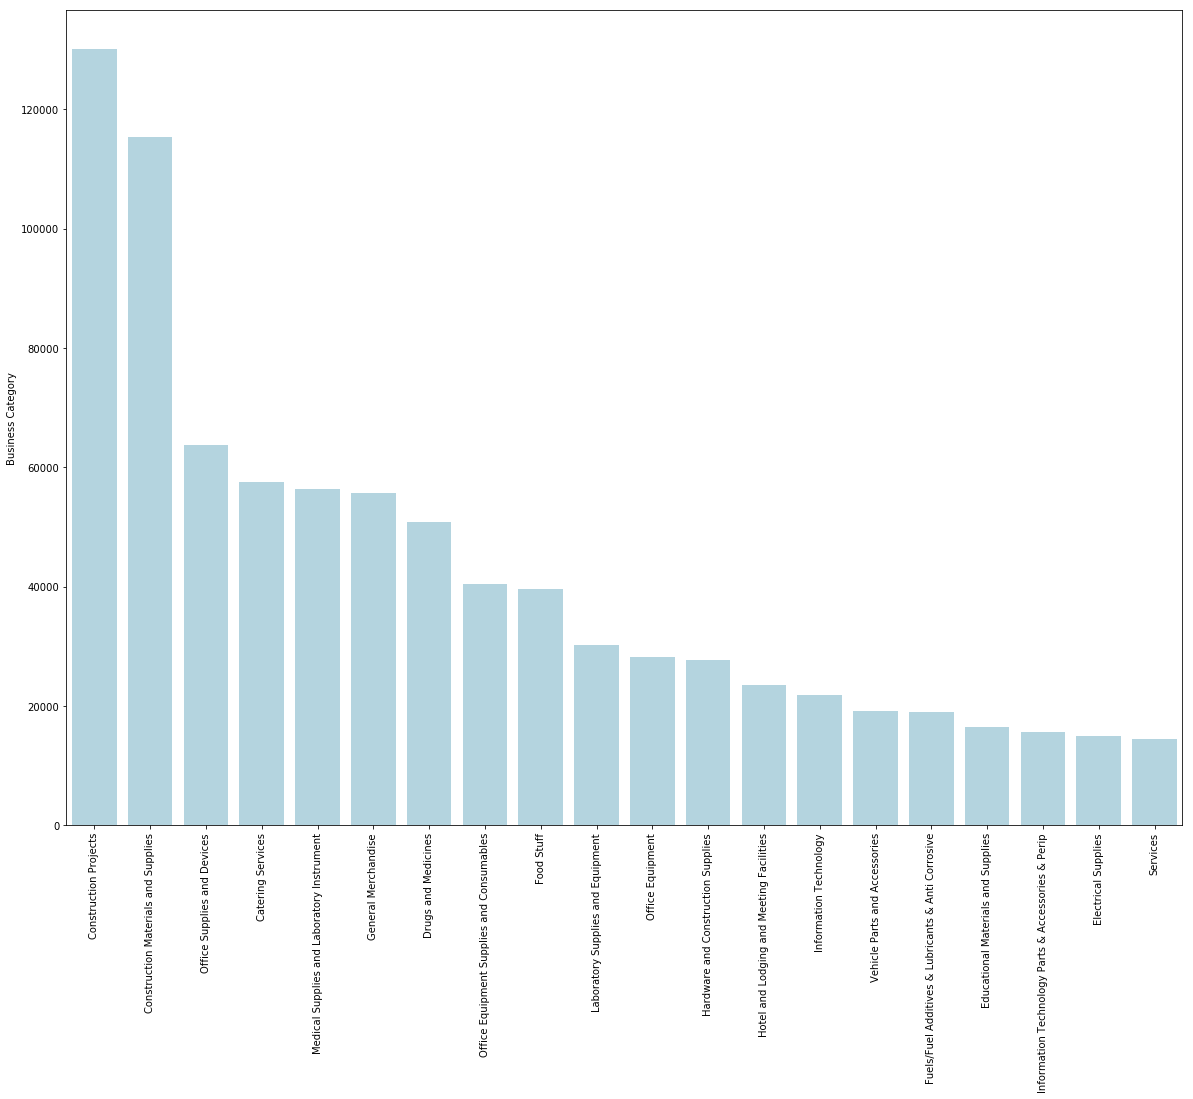

In [92]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
top = df_2019['Business Category'].value_counts().head(20)
chart = sns.barplot(top.index, top, color='lightblue');
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);


### Contract Amount by Notice Type Boxplot

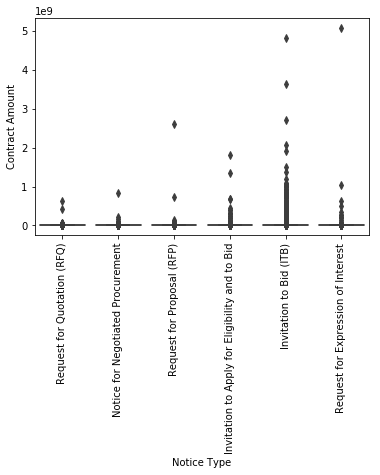

In [17]:
sorted_nb = df_2019.groupby(['Notice Type'])['Contract Amount'].median().sort_values()
chart = sns.boxplot(x=df_2019['Notice Type'], y=df_2019['Contract Amount'], order=list(sorted_nb.index))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Contract Amount by Business Category Boxplot

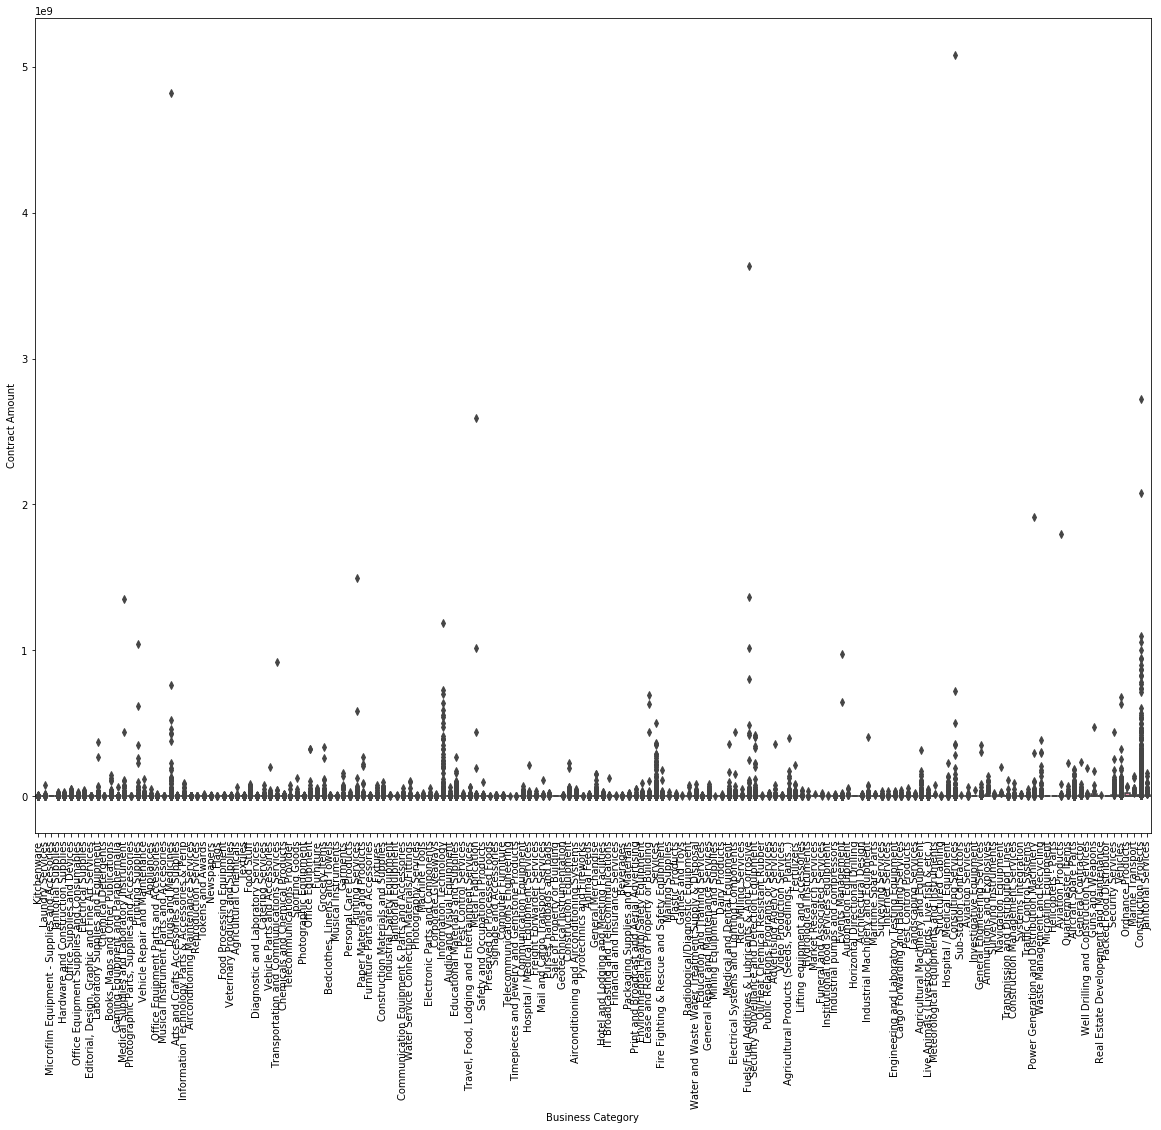

In [18]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sorted_nb = df_2019.groupby(['Business Category'])['Contract Amount'].median().sort_values()
chart = sns.boxplot(x=df_2019['Business Category'], y=df_2019['Contract Amount'], ax=ax, order=list(sorted_nb.index))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Contract Amount vs Approved Budget of the Contract Jointplot

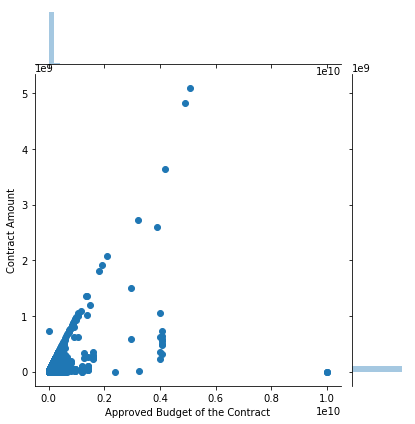

In [19]:
sns.jointplot(x=df_2019['Approved Budget of the Contract'], y=df_2019['Contract Amount']);

# Building the Network

A two mode graph for Information Technology (IT)  projects was constructed for 2014 and 2019. The years were chosen to examine the IT projects awarded during the term of different Philippine Presidents during their 4th year in office.  One set of nodes were the Government Organizations and the other set of nodes are the Corporate Awardees. An edge connects a Government Organization with a Corporate Awardee if a project was awarded by the Government Organization to the Corporate Awardee. The undirected edges were weighted with the number of awarded projects by a Government Organization to a Company. 

## Building the Network for Year 2014

### Filtering Using a Hard Threshold on Contract Amount

Only the top 20% of the `Contract Amount` will be taken. The threshold amount is **822,492 Philippine Pesos**

In [17]:
df_2014['Contract Amount'].quantile(0.8)

769216.0020000003

In [18]:
df_filtered_2014 = df_2014.loc[df_2014['Contract Amount'] > 0]

In [19]:
d_2014=df_2014.loc[df_2014['Awardee Corporate Title'] =="MASANGKAY COMPUTER CENTER"]

In [20]:
d_2014['Business Category'].unique()

array(['Information Technology',
       'Information Technology Parts & Accessories & Perip',
       'Office Supplies and Devices',
       'Office Equipment Supplies and Consumables',
       'Communication Equipment & Parts and Accessories',
       'Office Equipment', 'Transportation and Communications Services',
       'Sporting Goods', 'Computer Furniture', 'Photographic Equipment',
       'Communication Equipment', 'Printing Supplies',
       'Audio and Visual Equipment',
       'Office Equipment Parts and Accessories',
       'Power Generation and Distribution Machinery'], dtype=object)

In [21]:
d_2014= d_2014[['Business Category','Contract Amount']]

In [22]:
d_2014

Business Category  Contract Amount
6106                               Information Technology         640268.8
7878    Information Technology Parts & Accessories & P...          13789.0
14512                         Office Supplies and Devices         155316.0
18335                              Information Technology         399600.0
23332   Information Technology Parts & Accessories & P...          52900.0
...                                                   ...              ...
710644  Information Technology Parts & Accessories & P...          64780.0
710648  Information Technology Parts & Accessories & P...          21890.0
713733  Information Technology Parts & Accessories & P...         788974.0
715753                             Information Technology         463988.0
725528                                   Office Equipment         595242.0

[503 rows x 2 columns]

In [23]:
d_2014.groupby(['Business Category']).sum()


Contract Amount
Business Category                                                  
Audio and Visual Equipment                             3.799200e+04
Communication Equipment                                8.718600e+05
Communication Equipment & Parts and Accessories        5.513360e+06
Computer Furniture                                     8.735698e+06
Information Technology                                 1.480700e+08
Information Technology Parts & Accessories & Perip     6.037346e+07
Office Equipment                                       1.017392e+07
Office Equipment Parts and Accessories                 1.599270e+06
Office Equipment Supplies and Consumables              1.763761e+07
Office Supplies and Devices                            3.218533e+06
Photographic Equipment                                 2.075240e+05
Power Generation and Distribution Machinery            6.808780e+05
Printing Supplies                                      2.019150e+05
Sporting Goods                                         1.959200e+05
Transportation and Communications Services             8.280000e+04

In [24]:
df_filtered_2014['Contract Amount'].min()

0.01

In [25]:
df_filtered_2014

Organization Name Reference ID  \
17      DEPARTMENT OF PUBLIC WORKS AND HIGHWAYS - QUIR...      2507964   
18          PANGASINAN STATE UNIVERSITY - ALAMINOS CAMPUS      2507969   
22                         CABANATUAN CITY WATER DISTRICT      2507973   
23      LAGUNA STATE POLYTECHNIC UNIVERSITY - SINILOAN...      2507974   
48                                     PROVINCE OF LAGUNA      2488740   
...                                                   ...          ...   
725877            NATIONAL ELECTRIFICATION ADMINISTRATION      2995627   
725878                                     CITY OF LUCENA      2995635   
725879  DEPARTMENT OF PUBLIC WORKS AND HIGHWAYS - SORS...      2995640   
725880  DEPARTMENT OF PUBLIC WORKS AND HIGHWAYS - SORS...      2995642   
725887  DEPARTMENT OF AGRICULTURE - PHILIPPINE RURAL D...      2995652   

            Solicitation No.  \
17                  13BK0076   
18      PSU_Alaminos_01-2014   
22                PR#14-0001   
23         LSPUSinC-2014-001   
48                    PGL 01   
...                      ...   
725877           BAC-07-2014   
725878            V02-Dec-14   
725879              14FL0070   
725880              14FL0071   
725887             SH-001-15   

                                             Notice Title Publish Date  \
17      13BK0076 - Construction of Multi-Purpose Build...   2014-01-01   
18      Procurement  for the Purchase of Athletic Unif...   2014-01-01   
22                    Supply & Delivery of Brass Fittings   2014-01-01   
23                       Procurement of Security Services   2014-01-01   
48          Medicines and medical supplies for STCAA 2014   2014-01-02   
...                                                   ...          ...   
725877  SUPPLY, DELIVERY, INSTALLATION OF MULTI-MEDIA ...   2014-12-31   
725878  Construction of Two (2) Storey Lucena City Pub...   2014-12-31   
725879  14FL0070 - Replacement of Permanent Weak Bridg...   2014-12-31   
725880  14FL0071 - Replacement of Permanent Weak Bridg...   2014-12-31   
725887  SH-001-15 (PRDP NPCO) Accommodation and food f...   2014-12-31   

                          Classification                  Notice Type  \
17                           Civil Works      Invitation to Bid (ITB)   
18                                 Goods  Request for Quotation (RFQ)   
22                                 Goods  Request for Quotation (RFQ)   
23      Goods - General Support Services      Invitation to Bid (ITB)   
48                                 Goods  Request for Quotation (RFQ)   
...                                  ...                          ...   
725877                             Goods      Invitation to Bid (ITB)   
725878                       Civil Works      Invitation to Bid (ITB)   
725879                       Civil Works      Invitation to Bid (ITB)   
725880                       Civil Works      Invitation to Bid (ITB)   
725887                             Goods  Request for Quotation (RFQ)   

                                  Business Category  \
17                            Construction Projects   
18                                   Sporting Goods   
22      Water Service Connection Materials/Fittings   
23                                Security Services   
48                              Drugs and Medicines   
...                                             ...   
725877                       Information Technology   
725878                        Construction Projects   
725879                        Construction Projects   
725880                        Construction Projects   
725887     Hotel and Lodging and Meeting Facilities   

                             Funding Source  \
17      Government of the Philippines (GOP)   
18      Government of the Philippines (GOP)   
22      Government of the Philippines (GOP)   
23      Government of the Philippines (GOP)   
48      Government of the Philippines (GOP)   
...                                     ...   
725877  Go

In [26]:
df_filtered_2014['Business Category'].unique()

array(['Construction Projects', 'Sporting Goods',
       'Water Service Connection Materials/Fittings', 'Security Services',
       'Drugs and Medicines', 'Information Technology',
       'Transportation and Communications Services',
       'Laboratory Supplies and Equipment', 'Office Equipment',
       'General Merchandise', 'Janitorial Supplies',
       'Electronic Parts and Components',
       'Information Technology Parts & Accessories & Perip',
       'Security Surveillance and Detection Equipment',
       'Office Equipment Parts and Accessories',
       'Construction Materials and Supplies',
       'Fuels/Fuel Additives & Lubricants & Anti Corrosive',
       'Agricultural Products (Seeds, Seedlings, Plants..)',
       'Fertilizers', 'Engineering and Laboratory Testing Equipment',
       'Surveying Instruments', 'Consulting Services',
       'Agricultural Machinery and Equipment',
       'Educational Materials and Supplies', 'Garments',
       'Catering Services', 'Medical Supplie

In [27]:
len(df_filtered_2014['Business Category'].unique())

162

In [28]:
df_filtered_2014 = df_2014.loc[df_2014['Business Category']=='Information Technology']

In [29]:
df_filtered_2014['Business Category'].unique()

array(['Information Technology'], dtype=object)

From the filtered dataframe, only `'Organization Name'`,`'Notice Title'`,`'Awardee Corporate Title'`,'`Contract Amount'` will be included.

In [30]:
data_2014 = df_filtered_2014[['Organization Name','Notice Title','Awardee Corporate Title','Contract Amount']]
data_2014

Organization Name  \
33                PHILIPPINE HEALTH INSURANCE CORPORATION   
49      TOURISM INFRASTRUCTURE AND ENTERPRISE ZONE AUT...   
91         UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN   
111        UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN   
115              MUNICIPALITY OF TAMPAKAN, SOUTH COTABATO   
...                                                   ...   
725723                                  PROVINCE OF BOHOL   
725727                                  PROVINCE OF BOHOL   
725873                                  PROVINCE OF BOHOL   
725875                                  PROVINCE OF BOHOL   
725877            NATIONAL ELECTRIFICATION ADMINISTRATION   

                                             Notice Title  \
33                  13-0474  - Server with Heavy Duty UPS   
49      SUPPLY, INSTALLATION, TESTING AND COMMISSIONIN...   
91      Supply and Installation of a Many-Integrated-C...   
111     4 units of Branded Laptop Computers (Bid No. 2...   
115     Installation of Electronic Health Record Syste...   
...                                                   ...   
725723  0807-PR1450-2014 REBID PURCHASE OF UNINTERRUPT...   
725727  0806-PR1449-2014 REBID PURCHASE OF I.T. EQUIPM...   
725873  0812-PR1455-2014 REBID PURCHASE OF I.T. EQUIPM...   
725875  0811-PR1454-2014 REBID PURCHASE OF I.T. EQUIPM...   
725877  SUPPLY, DELIVERY, INSTALLATION OF MULTI-MEDIA ...   

                                 Awardee Corporate Title  Contract Amount  
33                                                   NaN              NaN  
49                         INFOBAHN COMMUNICATIONS, INC.       14800000.0  
91                                  S1 TECHNOLOGIES INC.         996800.0  
111                                                  NaN              NaN  
115                                                  NaN              NaN  
...                                                  ...              ...  
725723                                               NaN              NaN  
725727                                               NaN              NaN  
725873                                               NaN              NaN  
725875                                               NaN              NaN  
725877  PRONET SYSTEMS INTEGRATED NETWORK SOLUTION, INC.         895420.7  

[13319 rows x 4 columns]

In [31]:
data_2014.loc[data_2014['Awardee Corporate Title']=='MASANGKAY COMPUTER CENTER'].sum()

Organization Name          PHILIPPINE INSTITUTE OF VOLCANOLOGY AND SEISMO...
Notice Title               Supply and Delivery of One (1) lot Laptops and...
Awardee Corporate Title    MASANGKAY COMPUTER CENTERMASANGKAY COMPUTER CE...
Contract Amount                                                   1.4807e+08
dtype: object

Let's check for null values for each column.

In [32]:
data_2014.isna().sum()

Organization Name             0
Notice Title                  6
Awardee Corporate Title    8505
Contract Amount            8505
dtype: int64

Drop the rows with no `Awardee Corporate Title` name

In [33]:
df_try_2014 = data_2014.dropna(subset=['Awardee Corporate Title'])

In [34]:
df_try_2014.isna().sum()

Organization Name          0
Notice Title               2
Awardee Corporate Title    0
Contract Amount            0
dtype: int64

In [35]:
data_2014.isnull().sum()

Organization Name             0
Notice Title                  6
Awardee Corporate Title    8505
Contract Amount            8505
dtype: int64

In [36]:
df_clean_2014 = data_2014.dropna(subset=['Awardee Corporate Title'])

A new colum named `weight` is created. The weight is the count of awarded contracts to the corporation with the name under `Awardee Corporate Title` by a government agency under `Organization Name`.

In [37]:
df_final_2014 = df_clean_2014.groupby(['Organization Name','Awardee Corporate Title']).size().reset_index().rename(columns={0:'weight'})
df_final_2014

Organization Name  \
0     401ST CONTRACTING OFFICE, AFP PROCUREMENT SERVICE   
1     405TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE   
2             ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE   
3             ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE   
4             ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE   
...                                                 ...   
1764                     WESTERN PHILIPPINES UNIVERSITY   
1765  WESTERN VISAYAS COLLEGE OF SCIENCE AND TECHNOLOGY   
1766     ZAMBOANGA CITY SPECIAL ECONOMIC ZONE AUTHORITY   
1767           ZAMBOANGA CITY STATE POLYTECHNIC COLLEGE   
1768           ZAMBOANGA CITY STATE POLYTECHNIC COLLEGE   

                                Awardee Corporate Title  weight  
0             EVERYBODY'S TRADING & GENERAL MERCHANDISE      17  
1                                 ZYRRA KIM ENTERPRISES       1  
2                           ACCENT MICRO PRODUCTS, INC.       1  
3                       ACCENT MICRO TECHNOLOGIES, INC.       3  
4     ACE ELECTRONIC TECHNOLOGY, INC. DOING BUSINESS...       3  
...                                                 ...     ...  
1764                          MASANGKAY COMPUTER CENTER       1  
1765                           ALTO AUDIO DESIGN CENTER       1  
1766                          MASANGKAY COMPUTER CENTER       2  
1767                               CEEJAY'S ENTERPRISES       1  
1768                              PHONE PATCH MARKETING      24  

[1769 rows x 3 columns]

In [38]:
df_final_2014.isna().sum()

Organization Name          0
Awardee Corporate Title    0
weight                     0
dtype: int64

In [39]:
df_final_2014.isnull().sum()

Organization Name          0
Awardee Corporate Title    0
weight                     0
dtype: int64

In [40]:
df_final_2014.shape

(1769, 3)

In [41]:
df_final_2014.dropna().shape

(1769, 3)

### Contructing the Bipartite Network

Constructing the bipartite graph using `Networkx`'s **add_nodes_from()** and adding weighted edges using **add_weighted_edges_from()**.

In [42]:
C_2014 = nx.Graph()
C_2014.add_nodes_from(df_final_2014['Organization Name'], bipartite=0)
C_2014.add_nodes_from(df_final_2014['Awardee Corporate Title'], bipartite=1)
edges = df_final_2014[['Organization Name', 'Awardee Corporate Title','weight']].apply(tuple, axis=1)
C_2014.add_weighted_edges_from(edges)

In [43]:
nx.is_bipartite(C_2014)

True

Each edge contains a tuple of two nodes, and the weight of the edge.

Viewing all the edges 

In [44]:
C_2014.edges(data=True)

EdgeDataView([('401ST CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', "EVERYBODY'S TRADING & GENERAL MERCHANDISE", {'weight': 17}), ('405TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', 'ZYRRA KIM ENTERPRISES', {'weight': 1}), ('ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE', 'ACCENT MICRO PRODUCTS, INC.', {'weight': 1}), ('ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE', 'ACCENT MICRO TECHNOLOGIES, INC.', {'weight': 3}), ('ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE', 'ACE ELECTRONIC TECHNOLOGY, INC. DOING BUSINESS UNDER THE NAME AND STYLE OF ALEXAN COMMERCIAL', {'weight': 3}), ('ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE', 'AMERICAN TECHNOLOGIES INC.', {'weight': 1}), ('ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE', 'BAYANPC TECHNOLOGIES INC.', {'weight': 1}), ('ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE', 'CAVITECH ENTERPRISE', {'weight': 2}), ('ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE', 'CIM TECHNOLOGIES, INC.', {'weight': 2}), ('ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE', 'CLEAN WORLD TECH CORPORA

The government organizations are assigned as `top_nodes` while the corporations are assigned as `bottom_nodes`.

In [45]:
top_nodes_2014 = {n for n, d in C_2014.nodes(data=True) if d['bipartite']==0}
top_nodes_2014

{'401ST CONTRACTING OFFICE, AFP PROCUREMENT SERVICE',
 '405TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE',
 'ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE',
 'AFP - BIDS AND AWARDS COMMITTEE',
 'ANTI-MONEY LAUNDERING COUNCIL',
 'APAYAO STATE COLLEGE',
 'AUTHORITY OF THE FREEPORT AREA OF BATAAN',
 'BACOLOD CITY WATER DISTRICT',
 'BAGUIO WATER DISTRICT',
 'BANGKO SENTRAL NG PILIPINAS',
 'BARANGAY 6 POBLACION, CARMONA, CAVITE',
 'BARANGAY 667 ZONE 72 DISTRICT V, MANILA',
 'BARANGAY 837 ZONE 91, MANILA',
 'BARANGAY ABO, NAGCARLAN, LAGUNA',
 'BARANGAY BAGACAY KATIPUHAN, LOON, BOHOL',
 'BARANGAY BAGO-OSHIRO, DAVAO CITY, DAVAO DEL SUR',
 'BARANGAY BAHI, LOON, BOHOL',
 'BARANGAY BALITE, CALAPAN CITY',
 'BARANGAY BANCA-BANCA, NAGCARLAN, LAGUNA',
 'BARANGAY CABUG, LOON, BOHOL',
 'BARANGAY CABUYEW, NAGCARLAN, LAGUNA',
 'BARANGAY CALAWIS, ANTIPOLO',
 'BARANGAY CALAYUGAN SUR, LOON, BOHOL',
 'BARANGAY CAMPATUD, LOON, BOHOL',
 'BARANGAY CANDAIGAN, LOON, BOHOL',
 'BARANGAY CANHANGDON ORIENTAL, LOON, BOHO

In [46]:
bottom_nodes_2014 = set(C_2014) - top_nodes_2014
bottom_nodes_2014

{'16/35 MM PRODUCTION SUPPLY',
 '32 TRADING POST',
 '3GX COMPUTERS & I.T. SOLUTIONS',
 '3JM TELECOMMUNICATION AND ELECTRONIC SUPPLIES',
 '3MSG ENTERPRISES',
 "5J'S METAL CRAFT AND GENERAL MERCHANDISE CO. LTD.",
 '7CORE COMMUNICATIONS INC.',
 '838 TECH UNLTD. CO.',
 'A.G.D. ENTERPRISES',
 'A.Q. ENTERPRISES',
 'AAC TECH SOLUTIONS ENTERPRISES',
 'AAH BRANDING AND GRAPHIC DESIGN',
 'ABENSON VENTURES INC.',
 'ACCEL PRIME TECHNOLOGIES INCORPORATED',
 'ACCENT MICRO PRODUCTS, INC.',
 'ACCENT MICRO TECHNOLOGIES, INC.',
 'ACCESS OFFICE SYSTEMS',
 'ACE ELECTRONIC TECHNOLOGY, INC. DOING BUSINESS UNDER THE NAME AND STYLE OF ALEXAN COMMERCIAL',
 'ACECOM SYSTEM, INC.',
 'ACELOGIC COMPUTER SOLUTIONS',
 'ACL SERVICES (SINGAPORE) PTE. LTD.',
 'ACROPEAK ENTERPRISES',
 'ADECS INTERNATIONAL CORPORATION',
 "ADILYNNE'S GENERAL MERCHANDISE",
 'ADVANCE MICROSYSTEMS CORPORATION',
 'ADVANCE SOLUTIONS, INC.',
 'AEE COMPUTER ONLINE NETWORK, INC.',
 'AG DATACOM PHILS INC.',
 'AJ SOFTDRIVE INTERNET CAFE & COMPUTER S

To visualize the bipartite graph, we use **`nx.bipartite_layout()`**

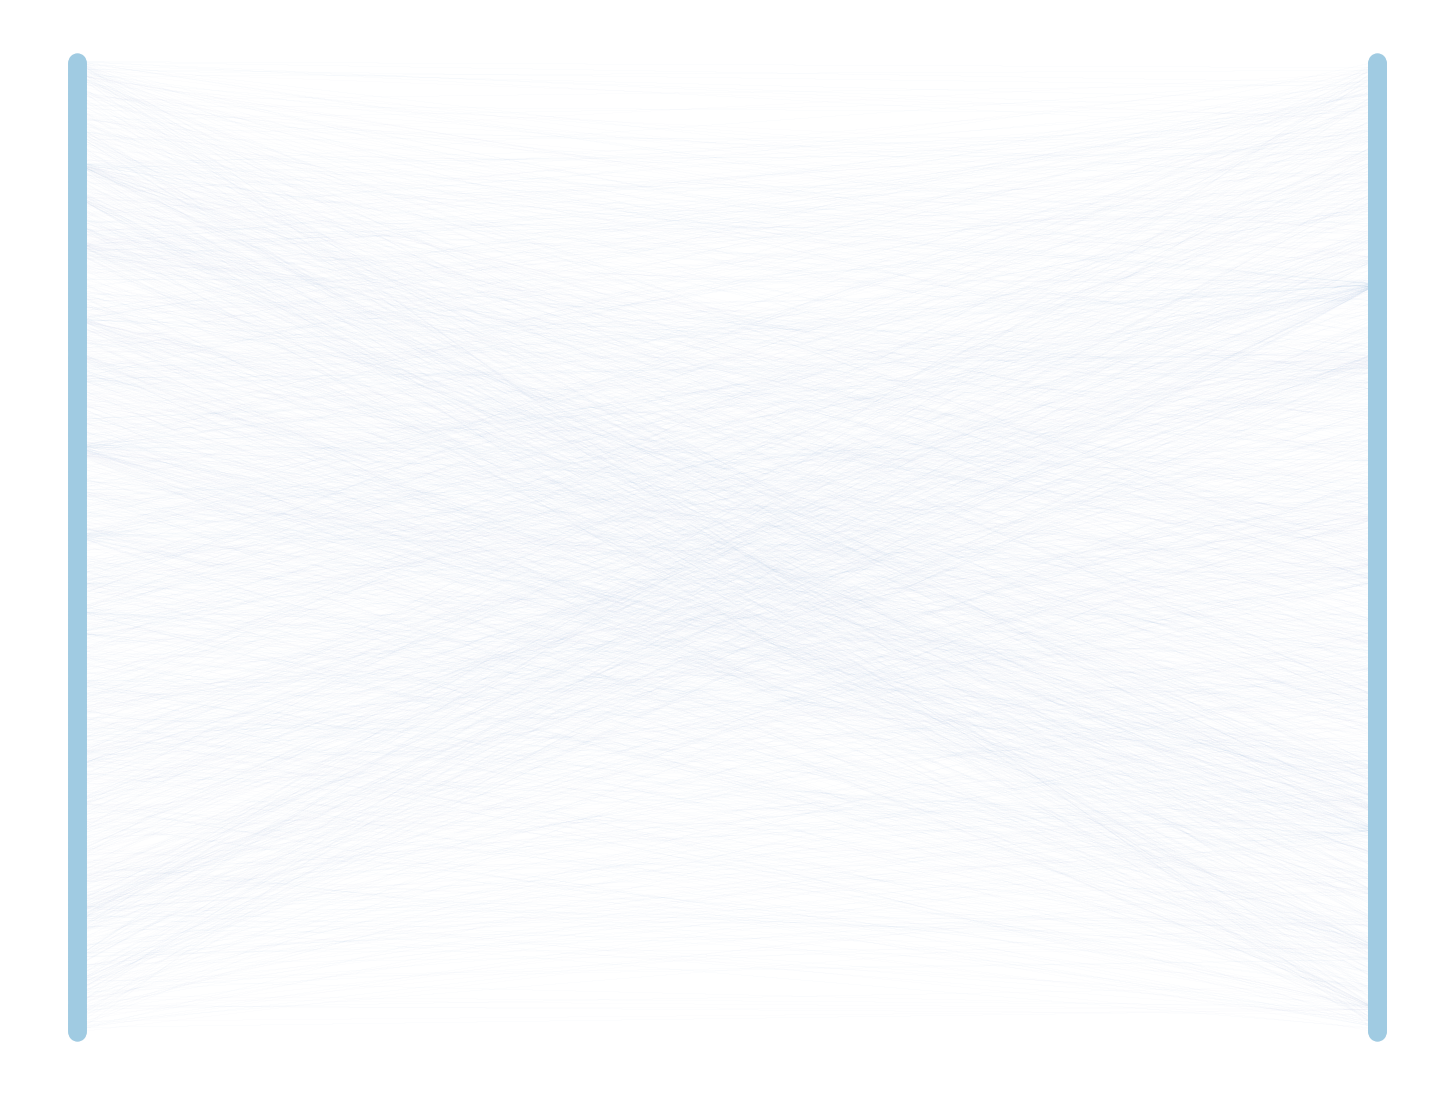

In [47]:
pos = nx.bipartite_layout(C_2014,top_nodes_2014)
plt.figure(figsize=[20,15])
# Pass that layout to nx.draw
nx.draw(C_2014,pos,node_color='#A0CBE2',edge_color='#0071C1',width=.01,
     edge_cmap=plt.cm.Blues,with_labels=False, )


## Building the Network for Year 2019

### Filtering Using a Hard Threshold on Contract Amount

Only the top 20% of the `Contract Amount` will be taken. The threshold amount is **822,492 Philippine Pesos**

In [20]:
df_2019['Contract Amount'].quantile(0.8)

822492.6000000007

In [21]:
df_filtered_2019 = df_2019.loc[df_2019['Contract Amount'] > 0]

In [22]:
d_2019=df_2019.loc[df_2019['Awardee Corporate Title'] =="MASANGKAY COMPUTER CENTER"]

In [23]:
d_2019['Business Category'].unique()

array(['Information Technology Parts & Accessories & Perip',
       'Office Equipment Supplies and Consumables', 'Office Equipment',
       'Information Technology',
       'Communication Equipment & Parts and Accessories',
       'General Merchandise', 'Computer Furniture',
       'Telecommunications Provider', 'Laboratory Supplies and Equipment',
       'Airconditioning and Airconditioning Systems', 'Printing Supplies',
       'Printing Services'], dtype=object)

In [24]:
d_2019= d_2019[['Business Category','Contract Amount']]

In [25]:
d_2019

Business Category  Contract Amount
4974     Information Technology Parts & Accessories & P...          98400.0
8706             Office Equipment Supplies and Consumables         306600.0
15710                                     Office Equipment         163875.0
16341                                     Office Equipment         923730.0
20240                                     Office Equipment          70300.0
...                                                    ...              ...
1105503  Information Technology Parts & Accessories & P...         349840.0
1108053                        Telecommunications Provider         600000.0
1114006          Office Equipment Supplies and Consumables         122500.0
1120026        Airconditioning and Airconditioning Systems         159000.0
1136666                                   Office Equipment         638500.0

[132 rows x 2 columns]

In [26]:
d_2019.groupby(['Business Category']).sum()


Contract Amount
Business Category                                                  
Airconditioning and Airconditioning Systems            3.940000e+05
Communication Equipment & Parts and Accessories        4.467914e+06
Computer Furniture                                     4.849100e+05
General Merchandise                                    4.597937e+06
Information Technology                                 1.448106e+08
Information Technology Parts & Accessories & Perip     3.072160e+07
Laboratory Supplies and Equipment                      2.129240e+05
Office Equipment                                       1.599926e+07
Office Equipment Supplies and Consumables              4.291000e+05
Printing Services                                      4.742000e+04
Printing Supplies                                      5.824000e+04
Telecommunications Provider                            1.987300e+06

In [27]:
df_filtered_2019['Contract Amount'].min()

0.01

In [28]:
df_filtered_2019

Organization Name  Reference ID  \
3                    PROVINCE OF EASTERN SAMAR       5937908   
4                    PROVINCE OF EASTERN SAMAR       5937983   
10                         PROVINCE OF PALAWAN       5938673   
11                              CITY OF ILOILO       5938674   
12                              CITY OF ILOILO       5938695   
...                                        ...           ...   
1157845           NATIONAL TAX RESEARCH CENTER       6781168   
1157846           NATIONAL TAX RESEARCH CENTER       6781169   
1157951             ILIGAN CITY CENTRAL SCHOOL       6781071   
1158175  LAND TRANSPORTATION OFFICE - REGION X       6781188   
1158176  LAND TRANSPORTATION OFFICE - REGION X       6781196   

                                          Solicitation No.  \
3                                             2018-12-0559   
4                                             2018-12-0560   
10                              B2 SB6 PEO 300-18-12-26971   
11                                              18-12-0890   
12                                              18-12-0889   
...                                                    ...   
1157845                                              43679   
1157846                                              43650   
1157951  2019-12-0077 Reproduction of 3rd Grading Test ...   
1158175                                           2019-082   
1158176                                           2019-084   

                                              Notice Title  \
3        2018-12-0559 - INVITATION TO BID FOR  IMPROVEM...   
4        2018-12-0560 - INVITATION TO BID FOR  CONSTRUC...   
10       CONSTRUCTION OF BAHAY TULUYAN IN QUEZON MEDICA...   
11           RENTAL OF HEAVY EQUIPMENT (PR No. 18-12-0890)   
12       COLLECTION OF GARBAGE IN THE CITY OF ILOILO (P...   
...                                                    ...   
1157845                          Sonicwall License Renewal   
1157846   License of Adobe Creative Cloud All Applications   
1157951  Reproduction of 3rd Grading Test  Paper for G1...   
1158175  2019-082 (Direct Contracting Exclusive Dealer/...   
1158176              Proc. of Commonly-use Office Supplies   

                   Publish Date Classification  \
3       2019-01-01 00:00:00.000    Civil Works   
4       2019-01-01 00:00:00.000    Civil Works   
10      2019-01-01 00:00:00.000    Civil Works   
11      2019-01-01 00:00:00.000          Goods   
12      2019-01-01 00:00:00.000          Goods   
...                         ...            ...   
1157845 2019-12-30 23:28:22.173          Goods   
1157846 2019-12-30 23:36:54.740          Goods   
1157951 2019-12-31 00:00:00.000          Goods   
1158175 2019-12-31 16:14:06.620          Goods   
1158176 2019-12-31 19:43:41.533          Goods   

                                            Notice Type  \
3                               Invitation to Bid (ITB)   
4                               Invitation to Bid (ITB)   
10                              Invitation to Bid (ITB)   
11                              Invitation to Bid (ITB)   
12                              Invitation to Bid (ITB)   
...                                                 ...   
1157845  Invitation to Apply for Eligibility and to Bid   
1157846  Invitation to Apply for Eligibility and to Bid   
1157951                     Request for Quotation (RFQ)   
1158175  Invitation to Apply for Eligibility and to Bid   
1158176  Invitation to Apply for Eligibility and to Bid   

                                         Business Category  \
3                                    Construction Projects   
4                                    Construction Projects   
10                                   Construction Projects   
11                                  Construction Equipment   
12                                      General Contractor   
...                                                    ...   
1157845                   

In [29]:
df_filtered_2019['Business Category'].unique()

array(['Construction Projects', 'Construction Equipment',
       'General Contractor', 'Furniture', 'Fixtures', 'Kitchenware',
       'Drugs and Medicines', 'Sporting Goods', 'Garments',
       'Office Equipment', 'General Merchandise',
       'Information Technology', 'Construction Materials and Supplies',
       'Catering Services', 'Janitorial Services', 'Events Management',
       'Agricultural Machinery and Equipment', 'Printing Services',
       'Hotel and Lodging and Meeting Facilities', 'Food Stuff',
       'Water and Waste Water Treatment Supply & Disposal',
       'Office Equipment Parts and Accessories',
       'Laboratory Supplies and Equipment',
       'Communication Equipment & Parts and Accessories',
       'Well Drilling and Construction Services',
       'Office Equipment Supplies and Consumables',
       'Medical Supplies and Laboratory Instrument',
       'Office Supplies and Devices',
       'Fuels/Fuel Additives & Lubricants & Anti Corrosive',
       'Industrial Ma

In [30]:
len(df_filtered_2019['Business Category'].unique())

168

In [31]:
df_filtered_2019 = df_2019.loc[df_2019['Business Category']=='Information Technology']

In [32]:
df_filtered_2019['Business Category'].unique()

array(['Information Technology'], dtype=object)

From the filtered dataframe, only `'Organization Name'`,`'Notice Title'`,`'Awardee Corporate Title'`,'`Contract Amount'` will be included.

In [33]:
data_2019 = df_filtered_2019[['Organization Name','Notice Title','Awardee Corporate Title','Contract Amount']]
data_2019

Organization Name  \
127      MUNICIPALITY OF PROSPERIDAD, AGUSAN DEL SUR   
154                          CARAGA STATE UNIVERSITY   
167                                PROVINCE OF BOHOL   
246                        CITY GOVERNMENT OF BACOOR   
340                          PHILIPPINE HEART CENTER   
...                                              ...   
1158071      CITY OF GENERAL SANTOS , SOUTH COTABATO   
1158072      CITY OF GENERAL SANTOS , SOUTH COTABATO   
1158073      CITY OF GENERAL SANTOS , SOUTH COTABATO   
1158074      CITY OF GENERAL SANTOS , SOUTH COTABATO   
1158078      CITY OF GENERAL SANTOS , SOUTH COTABATO   

                                              Notice Title  \
127                           PROCUREMENT OF IT EQUIPMENTS   
154      ITB- Provision of ICT Equipment (HPC) of Geo-S...   
167      PHO-19-001 PR2019-001 INVITATION TO BID FOR TH...   
246      PURCHASE OF VARIOUS OFFICE EQUIPMENT - CITY EN...   
340                         Four (4) units media Converter   
...                                                    ...   
1158071               20CB-GSC-015 PURCHASE OF IT SUPPLIES   
1158072               20CB-GSC-015 PURCHASE OF IT SUPPLIES   
1158073               20CB-GSC-015 PURCHASE OF IT SUPPLIES   
1158074               20CB-GSC-015 PURCHASE OF IT SUPPLIES   
1158078  20CB-GSC-017 INSTALLATION OF INTERGRATED PUBLI...   

        Awardee Corporate Title  Contract Amount  
127                         NaN              NaN  
154          COMFAC CORPORATION        3000000.0  
167                         NaN              NaN  
246                         NaN              NaN  
340                         NaN              NaN  
...                         ...              ...  
1158071                     NaN              NaN  
1158072                     NaN              NaN  
1158073                     NaN              NaN  
1158074                     NaN              NaN  
1158078                     NaN              NaN  

[21773 rows x 4 columns]

In [34]:
data_2019.loc[data_2019['Awardee Corporate Title']=='MASANGKAY COMPUTER CENTER'].sum()

Organization Name          PHILIPPINE SCIENCE HIGH SCHOOL - CALABARZON RE...
Notice Title               INVITATION TO BID FOR THE PROCUREMENT OF SOFTW...
Awardee Corporate Title    MASANGKAY COMPUTER CENTERMASANGKAY COMPUTER CE...
Contract Amount                                                  1.44811e+08
dtype: object

Let's check for null values for each column.

In [35]:
data_2019.isna().sum()

Organization Name              0
Notice Title                   0
Awardee Corporate Title    15888
Contract Amount            15894
dtype: int64

Drop the rows with no `Awardee Corporate Title` name

In [36]:
df_try_2019 = data_2019.dropna(subset=['Awardee Corporate Title'])

In [37]:
df_try_2019.isna().sum()

Organization Name          0
Notice Title               0
Awardee Corporate Title    0
Contract Amount            6
dtype: int64

In [38]:
data_2019.isnull().sum()

Organization Name              0
Notice Title                   0
Awardee Corporate Title    15888
Contract Amount            15894
dtype: int64

In [39]:
df_clean_2019 = data_2019.dropna(subset=['Awardee Corporate Title'])

A new colum named `weight` is created. The weight is the count of awarded contracts to the corporation with the name under `Awardee Corporate Title` by a government agency under `Organization Name`.

In [40]:
df_final_2019 = df_clean_2019.groupby(['Organization Name','Awardee Corporate Title']).size().reset_index().rename(columns={0:'weight'})
df_final_2019

Organization Name  \
0     104TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE   
1     104TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE   
2     104TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE   
3     107TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE   
4     107TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE   
...                                                 ...   
2848                      ZAMBOANGA CITY MEDICAL CENTER   
2849                      ZAMBOANGA CITY MEDICAL CENTER   
2850                      ZAMBOANGA CITY MEDICAL CENTER   
2851                      ZAMBOANGA CITY WATER DISTRICT   
2852                      ZAMBOANGA CITY WATER DISTRICT   

                         Awardee Corporate Title  weight  
0               ACS TECH AND GENERAL MERCHANDISE      20  
1                     MICROTRADE GCM CORPORATION       1  
2                            R AND W ENTERPRISES       1  
3                       ALREN'S GEN. MERCHANDISE       1  
4                              ANG TIAGA TRADING       1  
...                                          ...     ...  
2848  SILICON VALLEY COMPUTER GROUP PHILS., INC.       3  
2849               THE VALUE SYSTEMS PHILS. INC.       1  
2850                         Z.C. LM ENTERPRISES       1  
2851                          OS1 SOLUTIONS INC.       1  
2852                           SPUDS ENTERPRISES       1  

[2853 rows x 3 columns]

In [41]:
df_final_2019.isna().sum()

Organization Name          0
Awardee Corporate Title    0
weight                     0
dtype: int64

In [42]:
df_final_2019.isnull().sum()

Organization Name          0
Awardee Corporate Title    0
weight                     0
dtype: int64

In [43]:
df_final_2019.shape

(2853, 3)

In [44]:
df_final_2019.dropna().shape

(2853, 3)

### Contructing the Bipartite Network

Constructing the bipartite graph using `Networkx`'s **add_nodes_from()** and adding weighted edges using **add_weighted_edges_from()**.

In [45]:
C_2019 = nx.Graph()
C_2019.add_nodes_from(df_final_2019['Organization Name'], bipartite=0)
C_2019.add_nodes_from(df_final_2019['Awardee Corporate Title'], bipartite=1)
edges = df_final_2019[['Organization Name', 'Awardee Corporate Title','weight']].apply(tuple, axis=1)
C_2019.add_weighted_edges_from(edges)

In [43]:
nx.is_bipartite(C_2019)

True

Each edge contains a tuple of two nodes, and the weight of the edge.

Viewing all the edges 

In [47]:
C_2019.edges(data=True)

EdgeDataView([('104TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', 'ACS TECH AND GENERAL MERCHANDISE', {'weight': 20}), ('104TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', 'MICROTRADE GCM CORPORATION', {'weight': 1}), ('104TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', 'R AND W ENTERPRISES', {'weight': 1}), ('107TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', "ALREN'S GEN. MERCHANDISE", {'weight': 1}), ('107TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', 'ANG TIAGA TRADING', {'weight': 1}), ('107TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', 'JEDF CONSTRUCTING AND TRADING', {'weight': 2}), ('107TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', 'LSC ENTERPRISES', {'weight': 1}), ('107TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', 'MIGUELUZ TRADING', {'weight': 2}), ('107TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', 'MITONI BUSINESS VENTURES', {'weight': 2}), ('107TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', 'RG SANTOS TRADING', {'weight': 1}), ('113RD CO AFP PROCUREMENT

The government organizations are assigned as `top_nodes` while the corporations are assigned as `bottom_nodes`.

In [48]:
top_nodes_2019 = {n for n, d in C_2019.nodes(data=True) if d['bipartite']==0}
top_nodes_2019

{'104TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE',
 '107TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE',
 '113RD CO AFP PROCUREMENT SERVICE',
 '114TH CONTRACTING OFFICE FOR INFRASTRUCTURE, AFPPS',
 '301ST CONTRACTING OFFICE, AFP PROCUREMENT SERVICE',
 '305TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE',
 '405TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE',
 '407TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE',
 '408TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE',
 '409TH CONTRACTING OFFICE',
 'ABRA STATE INSTITUTE OF SCIENCES AND TECHNOLOGY',
 'AFP - RETIREMENT AND SEPARATION BENEFITS SYSTEM',
 'AGRICULTURAL CREDIT POLICY COUNCIL',
 'AGRICULTURAL TRAINING INSTITUTE- REGIONAL TRAINING CENTER 02',
 'AGRICULTURAL TRAINING INSTITUTE-REGIONAL TRAINING CENTER-8',
 'AGUSAN DEL SUR STATE COLLEGE OF AGRICULTURE AND TECHNOLOGY',
 'ALAMINOS CITY WATER DISTRICT',
 'AMANG RODRIGUEZ MEMORIAL MEDICAL CENTER',
 'ANGELES CITY WATER DISTRICT',
 'APO PRODUCTION UNIT, INC.',
 'AURORA PACIFIC ECONOMIC ZO

In [49]:
bottom_nodes_2019 = set(C_2019) - top_nodes_2019
bottom_nodes_2019

{'SIM COMPUTER SALES, INC.',
 'PAGES AND BINDERS OFFICE ESSENTIALS MARKETING',
 'AMAZING COMPUTER SYSTEMS & ENTERPRISES',
 'MICROBEST SOLUTIONS INC.',
 'RIGHT-CLICK COMPUTER SOLUTION AND SERVICES',
 'XORAND SOLUTIONS COMPUTER CORPORATION',
 'CAPCOM ENTERPRISES',
 'CIRCLE COMPUBIZ',
 'COLORITE MARKETING CORPORATION',
 'CIM TECHNOLOGIES, INC.',
 'ORMOC RIZAL ENTERPRISES COMPANY',
 'HARDY COM COMPUTERS SALES',
 'AMBASSADOR APPLIANCES, INC.',
 'EXPRESS CARDS ENTERPRISE COMPANY',
 'SITECH PHL INC.',
 'LICHT INDUSTRIAL CORPORATION',
 'TIGERPOINT DISTRIBUTION  INC.',
 'AS1 TECHVENTURES , INC.',
 'BCG ENTERPRISES',
 'VIRACDOTCOM ENTERPRISES',
 'CODE DYNAMIKS GLOBAL, INC.',
 'CDYO CONSUMER GOODS TRADING',
 'AMSOR ENTERPRISES',
 'CCTR ENTERPRISES',
 'MICROGENESIS SOFTWARE, INC. DOING BUSINESS UNDER THE NAME AND STYLE OF MICROGENESIS BUSINESS SYSTEMS',
 'GLOBALCHIPS TECHNOLOGIES CDO, INC.',
 'SEVENSTAR ENTERPRISES',
 'SPECTRAMIND SYSTEMS TECHNOLOGY, INC.',
 'MUSTARD SEED SYSTEMS CORPORATION',
 'T

To visualize the bipartite graph, we use **`nx.bipartite_layout()`**

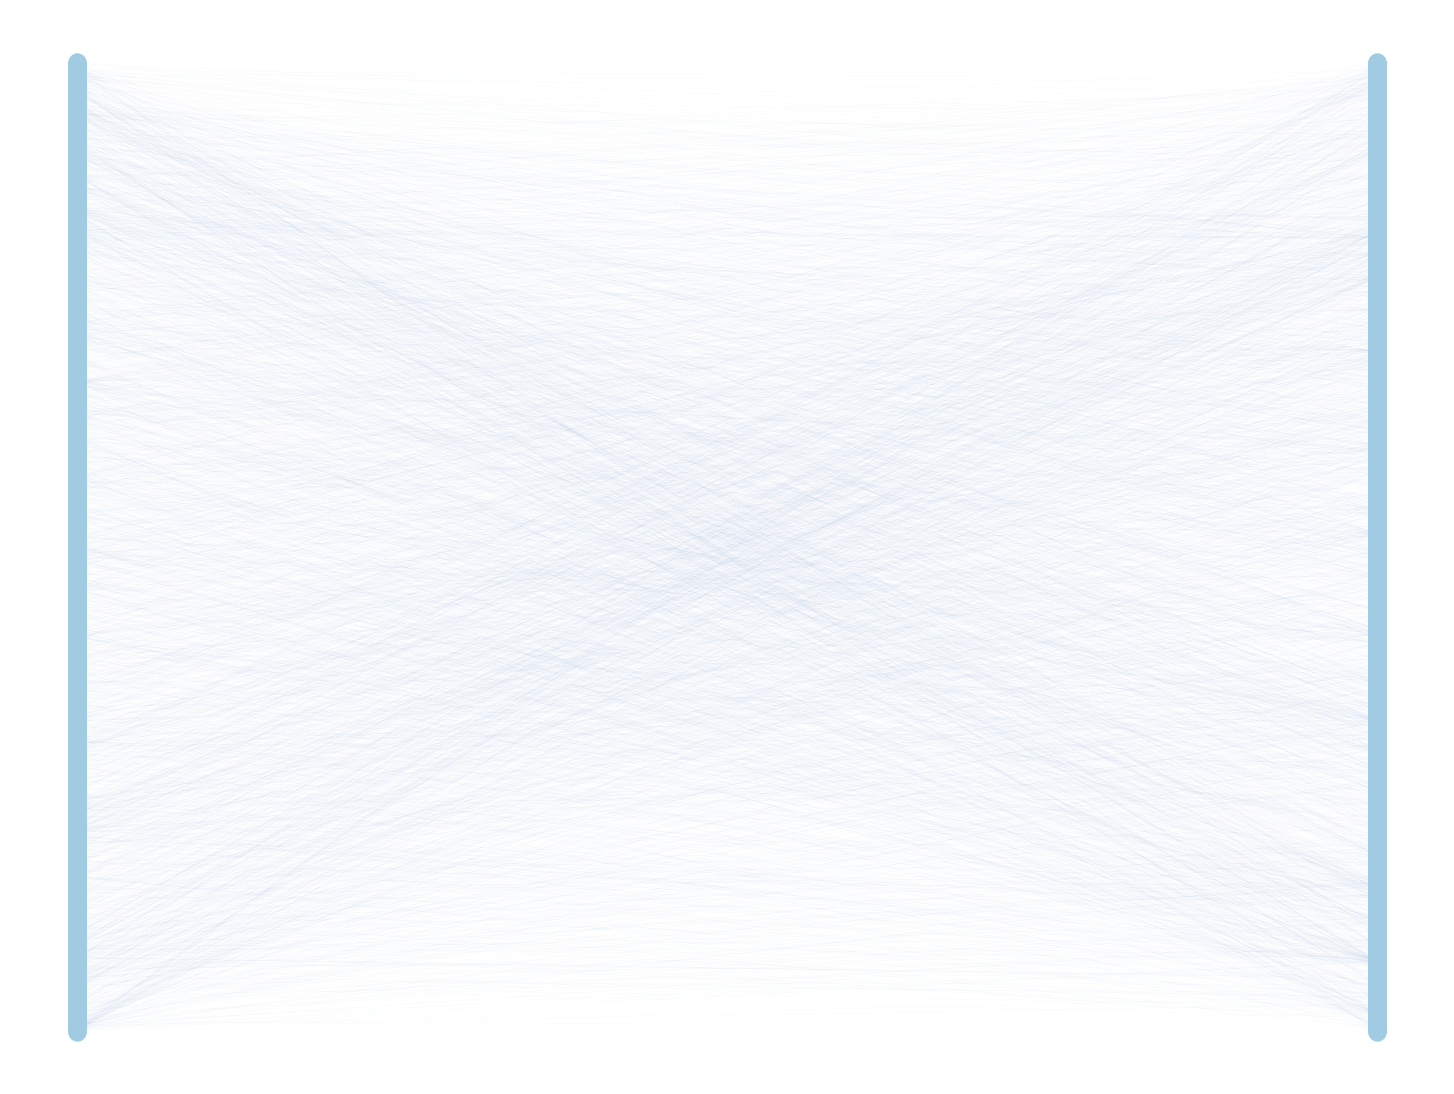

In [50]:
pos = nx.bipartite_layout(C_2019,top_nodes_2019)
plt.figure(figsize=[20,15])
# Pass that layout to nx.draw
nx.draw(C_2019,pos,node_color='#A0CBE2',edge_color='#0071C1',width=.01,
     edge_cmap=plt.cm.Blues,with_labels=False, )


# Network Analysis

The bipartite network was analyzed using NetworkX. network properties such as the number of nodes, no. of edges, average unweighted degree, average weighted degree, and network diameter were calculated.  To analyze a bipartite graph, a projection of the top nodes and bottom nodes are created. The projected graph O is a network of government agencies connected if they have a corporation that was able to secure a contract from each of them. The projected graph A is a network of corporations/contractors that won a contract from the same government agency. Different centrality measures (Degree, Closeness, Betweenness, Eigenvector) were taken from both projections. The top 20 for each centrality measure were then extracted to reveal top Government Organizations, and Corporate Awardees. The networks were then visualized using Gephi. 


We analyzed the Philippine government procurement as a bipartite network for the years 2014 and 2019. We also analyzed both the projected government organization network and corporate awardee network. We focused our analysis on the changes in the structure of the network and in revealing important actors in the network. 

## Helper functions

Create a function that returns the quantitative characteristics of a graph like the total number of nodes, number of edges, average degree, clustering coefficient, and number of communities present.

In [48]:
def graph_charac (G):
    N = G.order()
    L = G.size() 
#     D = G.diameter()
#     c = G.center()
    avg_deg = 2*float(L) / N 
    cc = nx.clustering(G)
    avg_clust = sum(cc.values()) / len(cc)
    partition = community.best_partition(G)
    print ('Nodes: ', N)
    print ('Edges: ', L)
    print ('Average degree: ', avg_deg)
#     print ('Diameter: ', D)
#     print ('Center: ', c)
    print('Clustering Coefficient: ',avg_clust)
    print ("Number of Communities: ", len(set(partition.values())))

To create a function that calculates the degree, betweeness, closeness, and eigenvector centralities for an input graph.

In [49]:
def graph_centrality(G):
    pos = nx.fruchterman_reingold_layout(G)
    fig = plt.figure(figsize=(20,15));

    centralities = [list(nx.degree_centrality(G).values()), 
                    list(nx.closeness_centrality(G).values()), 
                    list(nx.betweenness_centrality(G).values()),
                    list(nx.eigenvector_centrality(G).values())]
    titles = ['Degree Centrality', 'Closeness Centrality', 
              'Betweenness Centrality', 'Eigenvector Centrality']

    for i in range(4):
        ax = fig.add_subplot(2, 2, i+1);
        nc = nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r,
                                node_color=centralities[i]);
        nx.draw_networkx_edges(G, pos, alpha=0.500);
    #     nx.draw_networkx_labels(G, pos, font_color='k');
        plt.title(titles[i]);
        plt.axis('off');
        plt.colorbar(nc);

    plt.show();

In [50]:
def top20_closeness(G, data):
    d = nx.closeness_centrality(G)
    awardee = []
    for w in sorted(d, key=d.get, reverse=True):
        awardee.append(w)
    top20 = awardee[:20]
    top20_cp = []
    for c in top20:
        tot_cp = 0
        for i in range(len(data)):
            if data['Awardee Corporate Title'].iloc[i] == c:
                tot_cp = tot_cp + data['Contract Amount'].iloc[i]
        top20_cp.append(tot_cp)
    df3 = pd.DataFrame(list(zip(top20, top20_cp)), 
                   columns =['Awardee Corporate Title', 'Total Contract Amount']) 
    return df3

In [51]:
def top20_degree(G, data):
    d = nx.degree_centrality(G)
    awardee = []
    for w in sorted(d, key=d.get, reverse=True):
        awardee.append(w)
    top20 = awardee[:20]
    top20_cp = []
    for c in top20:
        tot_cp = 0
        for i in range(len(data)):
            if data['Awardee Corporate Title'].iloc[i] == c:
                tot_cp = tot_cp + data['Contract Amount'].iloc[i]
        top20_cp.append(tot_cp)
    df3 = pd.DataFrame(list(zip(top20, top20_cp)), 
                   columns =['Awardee Corporate Title', 'Total Contract Amount']) 
    return df3

In [52]:
def top20_bet(G, data):
    d = nx.betweenness_centrality(G)
    awardee = []
    for w in sorted(d, key=d.get, reverse=True):
        awardee.append(w)
    top20 = awardee[:20]
    top20_cp = []
    for c in top20:
        tot_cp = 0
        for i in range(len(data)):
            if data['Awardee Corporate Title'].iloc[i] == c:
                tot_cp = tot_cp + data['Contract Amount'].iloc[i]
        top20_cp.append(tot_cp)
    df3 = pd.DataFrame(list(zip(top20, top20_cp)), 
                   columns =['Awardee Corporate Title', 'Total Contract Amount']) 
    return df3

In [53]:
def top20_eigen(G, data):
    d = nx.eigenvector_centrality(G)
    awardee = []
    for w in sorted(d, key=d.get, reverse=True):
        awardee.append(w)
    top20 = awardee[:20]
    top20_cp = []
    for c in top20:
        tot_cp = 0
        for i in range(len(data)):
            if data['Awardee Corporate Title'].iloc[i] == c:
                tot_cp = tot_cp + data['Contract Amount'].iloc[i]
        top20_cp.append(tot_cp)
    df3 = pd.DataFrame(list(zip(top20, top20_cp)), 
                   columns =['Awardee Corporate Title', 'Total Contract Amount']) 
    return df3

The degree distribution for the bipartite and projected graphs will be displayed using the function `deg_distribution`

In [54]:
def deg_distribution(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    plt.loglog(deg,cnt)
    plt.title("Degree count plot")
    plt.ylabel("degree")
    plt.xlabel("count")


Create a function to plot different graph layouts.

In [55]:
def graph_layout(G):
    
    fig = plt.figure(figsize=(20,15));
    
    ax = fig.add_subplot(3, 3, 1);
    pos = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r);
    nx.draw_networkx_edges(G, pos, alpha=0.500);
    plt.title('fruchterman_reingold_layout');
    plt.axis('off');
    
    ax = fig.add_subplot(3, 3, 2);
    pos = nx.circular_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r);
    nx.draw_networkx_edges(G, pos, alpha=0.500);
    plt.title('circular_layout');
    plt.axis('off');
    
    ax = fig.add_subplot(3, 3, 3);
    pos = nx.random_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r);
    nx.draw_networkx_edges(G, pos, alpha=0.500);
    plt.title('random_layout');
    plt.axis('off');
    
    ax = fig.add_subplot(3, 3, 4);
    pos = nx.shell_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r);
    nx.draw_networkx_edges(G, pos, alpha=0.500);
    plt.title('shell_layout');
    plt.axis('off');
    
    ax = fig.add_subplot(3, 3, 5);
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r);
    nx.draw_networkx_edges(G, pos, alpha=0.500);
    plt.title('spring_layout');
    plt.axis('off');
    
    ax = fig.add_subplot(3, 3, 6);
    pos = nx.spectral_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r);
    nx.draw_networkx_edges(G, pos, alpha=0.500);
    plt.title('spectral_layout');
    plt.axis('off');
    
    plt.show();

## 2014 Network Analysis


### Network Characteristics

Create a function that returns the quantitative characteristics of a graph like the total number of nodes, number of edges, average degree, clustering coefficient, and number of communities present.

In [56]:
graph_charac(C_2014)

Nodes:  1424
Edges:  1769
Average degree:  2.484550561797753
Clustering Coefficient:  0.0
Number of Communities:  177


To analyze a bipartite graph, a projection of the top nodes and bottom nodes are created. The projected graph O is a network of government agencies connected if they have a corporation that was able to secure a contract from each of them. The projected graph A is a network of corporations/contractors that won a contract from the same government agency. 

In [57]:
O_2014 = bipartite.projected_graph(C_2014, top_nodes_2014)
A_2014 = bipartite.projected_graph(C_2014, bottom_nodes_2014)

In [59]:
graph_charac(A_2014)

Nodes:  777
Edges:  4705
Average degree:  12.110682110682111
Clustering Coefficient:  0.5972663950303093
Number of Communities:  161


In [58]:
graph_charac(O_2014)

Nodes:  647
Edges:  5994
Average degree:  18.528593508500773
Clustering Coefficient:  0.5482333811079318
Number of Communities:  159


### Network Centralities

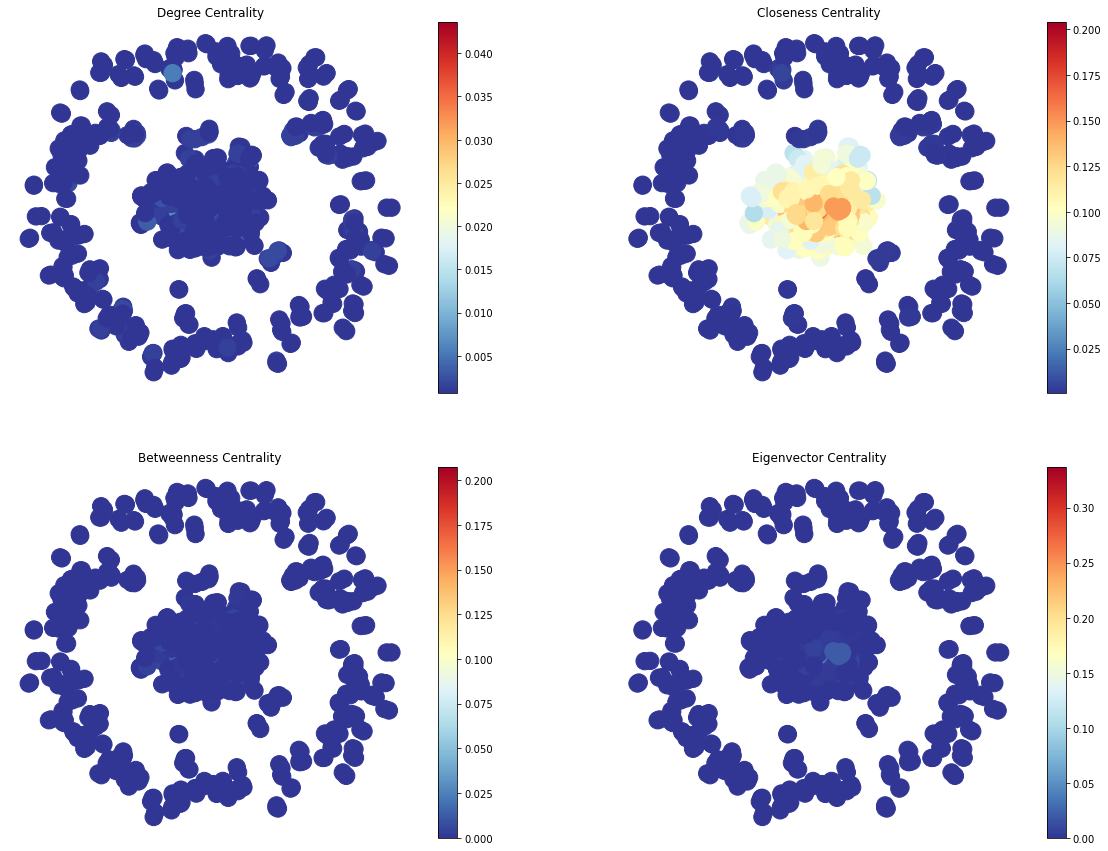

In [60]:
graph_centrality(C_2014)

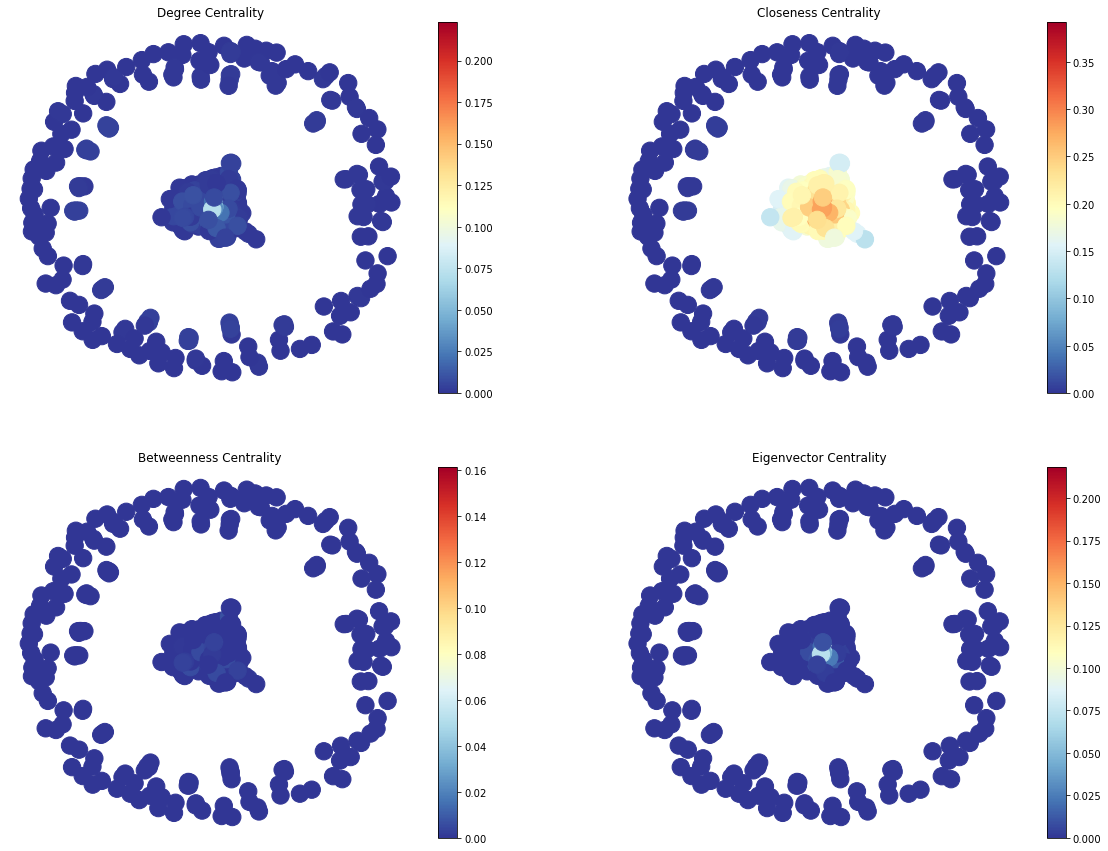

In [61]:
graph_centrality(A_2014)

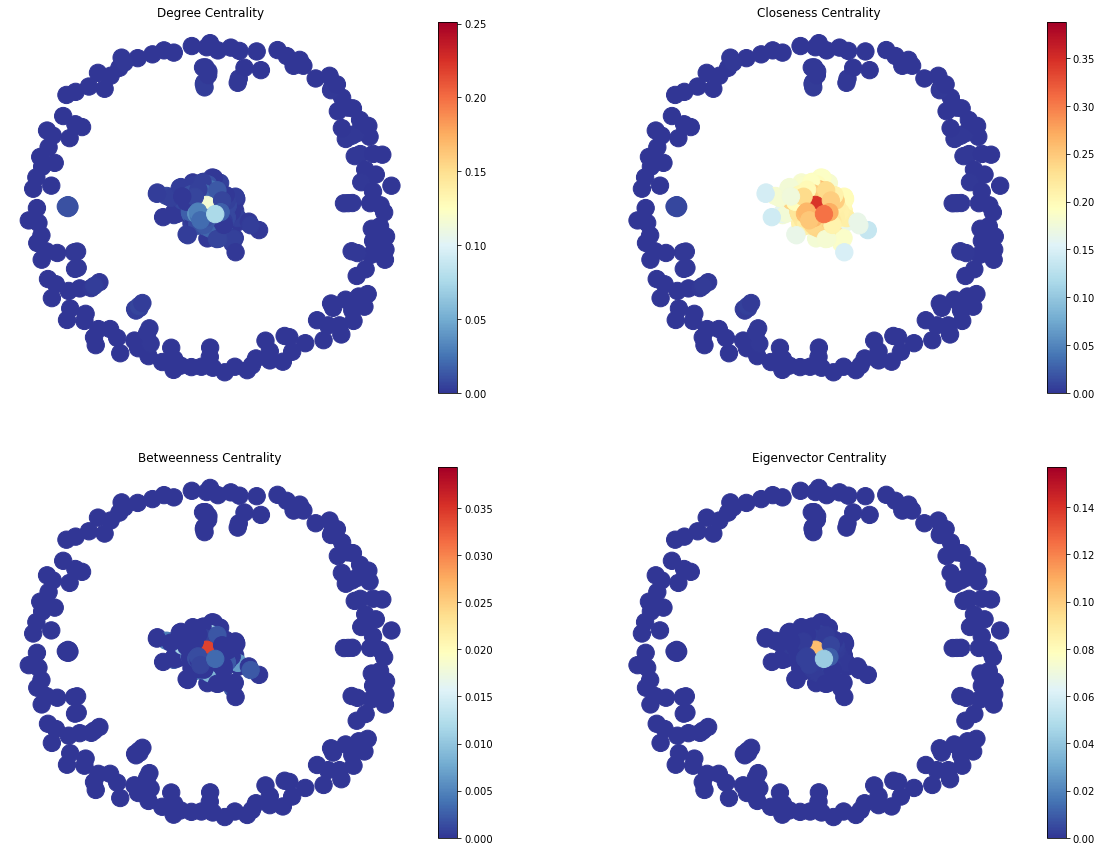

In [62]:
graph_centrality(O_2014)

### Top 20 by Network Centralities

After calculating the centralities, we rank them and get only the top 20. We then calculate the total contract amount won by the companies by contracting for the government last year.

In [63]:
top20_closeness(C_2014, data_2014)

Awardee Corporate Title  Total Contract Amount
0                           MASANGKAY COMPUTER CENTER           1.480700e+08
1   HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...           0.000000e+00
2   DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...           0.000000e+00
3      UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN           0.000000e+00
4                    DEPARTMENT OF AGRICULTURE - MAIN           0.000000e+00
5                          AMERICAN TECHNOLOGIES INC.           5.650493e+07
6                         COLUMBIA TECHNOLOGIES, INC.           1.895236e+08
7       PHILIPPINE NATIONAL OIL COMPANY - MAIN OFFICE           0.000000e+00
8         PCARRD-DEPARTMENT OF SCIENCE AND TECHNOLOGY           0.000000e+00
9   DEPARTMENT OF THE INTERIOR AND LOCAL GOVERNMEN...           0.000000e+00
10              FOOD AND NUTRITION RESEARCH INSTITUTE           0.000000e+00
11                                PROCUREMENT SERVICE           0.000000e+00
12                             SOCIAL SECURITY SYSTEM           0.000000e+00
13               DEPARTMENT OF SCIENCE AND TECHNOLOGY           0.000000e+00
14   PRONET SYSTEMS INTEGRATED NETWORK SOLUTION, INC.           1.495829e+08
15  PHILIPPINE AMUSEMENT AND GAMING CORPORATION - ...           0.000000e+00
16          NATIONAL INTELLIGENCE COORDINATING AGENCY           0.000000e+00
17                               S1 TECHNOLOGIES INC.           1.294067e+07
18  PHILIPPINE HEALTH INSURANCE CORPORATION - REGI...           0.000000e+00
19                             SAMAR STATE UNIVERSITY           0.000000e+00

In [64]:
top20_degree(C_2014, data_2014)

Awardee Corporate Title  Total Contract Amount
0                           MASANGKAY COMPUTER CENTER           1.480700e+08
1      UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN           0.000000e+00
2                         COLUMBIA TECHNOLOGIES, INC.           1.895236e+08
3                             ADVANCE SOLUTIONS, INC.           8.580256e+08
4   HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...           0.000000e+00
5           LANDBANK OF THE PHILIPPINES - HEAD OFFICE           0.000000e+00
6                                 PROCUREMENT SERVICE           0.000000e+00
7   DCI INT'L. I.T. SOLUTIONS AND SERVICES CORPORA...           3.697213e+07
8                          AMERICAN TECHNOLOGIES INC.           5.650493e+07
9                 GOVERNMENT SERVICE INSURANCE SYSTEM           0.000000e+00
10           COMPUCARE CORPORATION (COMPUCARE CENTER)           2.490004e+07
11                          BAYANPC TECHNOLOGIES INC.           4.037569e+06
12  DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...           0.000000e+00
13        PHILIPPINE AMUSEMENT AND GAMING CORPORATION           0.000000e+00
14   PRONET SYSTEMS INTEGRATED NETWORK SOLUTION, INC.           1.495829e+08
15                        BANGKO SENTRAL NG PILIPINAS           0.000000e+00
16                         COMPUSPEC SALES & SERVICES           1.116755e+07
17                       PHILIPPINE NORMAL UNIVERSITY           0.000000e+00
18                               S1 TECHNOLOGIES INC.           1.294067e+07
19                        TRENDS & TECHNOLOGIES, INC.           2.516349e+08

In [65]:
top20_bet(C_2014, data_2014)

Awardee Corporate Title  Total Contract Amount
0                           MASANGKAY COMPUTER CENTER           1.480700e+08
1      UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN           0.000000e+00
2                         COLUMBIA TECHNOLOGIES, INC.           1.895236e+08
3                          AMERICAN TECHNOLOGIES INC.           5.650493e+07
4   HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...           0.000000e+00
5                     MARIANO MARCOS STATE UNIVERSITY           0.000000e+00
6                                 PROCUREMENT SERVICE           0.000000e+00
7                    DEPARTMENT OF AGRICULTURE - MAIN           0.000000e+00
8                                PHILCOPY CORPORATION           2.831024e+06
9                             ADVANCE SOLUTIONS, INC.           8.580256e+08
10  DCI INT'L. I.T. SOLUTIONS AND SERVICES CORPORA...           3.697213e+07
11                         COMPUSPEC SALES & SERVICES           1.116755e+07
12  DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...           0.000000e+00
13                    NG KHAI DEVELOPMENT CORPORATION           3.632640e+07
14  DEPARTMENT OF SCIENCE AND TECHNOLOGY - REGION VII           0.000000e+00
15                        TRENDS & TECHNOLOGIES, INC.           2.516349e+08
16        CEBU TECHNOLOGICAL UNIVERSITY - MAIN CAMPUS           0.000000e+00
17     DEPARTMENT OF AGRARIAN REFORM - NORTH BUKIDNON           0.000000e+00
18                       PHILIPPINE NORMAL UNIVERSITY           0.000000e+00
19           COMPUCARE CORPORATION (COMPUCARE CENTER)           2.490004e+07

In [66]:
top20_eigen(C_2014, data_2014)

Awardee Corporate Title  Total Contract Amount
0                           MASANGKAY COMPUTER CENTER           1.480700e+08
1                         COLUMBIA TECHNOLOGIES, INC.           1.895236e+08
2                          AMERICAN TECHNOLOGIES INC.           5.650493e+07
3   HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...           0.000000e+00
4                             ADVANCE SOLUTIONS, INC.           8.580256e+08
5                                 PROCUREMENT SERVICE           0.000000e+00
6      UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN           0.000000e+00
7   DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...           0.000000e+00
8   DCI INT'L. I.T. SOLUTIONS AND SERVICES CORPORA...           3.697213e+07
9            COMPUCARE CORPORATION (COMPUCARE CENTER)           2.490004e+07
10                GOVERNMENT SERVICE INSURANCE SYSTEM           0.000000e+00
11                               S1 TECHNOLOGIES INC.           1.294067e+07
12                          BAYANPC TECHNOLOGIES INC.           4.037569e+06
13   PRONET SYSTEMS INTEGRATED NETWORK SOLUTION, INC.           1.495829e+08
14              FOOD AND NUTRITION RESEARCH INSTITUTE           0.000000e+00
15      PHILIPPINE NATIONAL OIL COMPANY - MAIN OFFICE           0.000000e+00
16                   DEPARTMENT OF AGRICULTURE - MAIN           0.000000e+00
17           PHILIPPINE DEPOSIT INSURANCE CORPORATION           0.000000e+00
18                       PHILIPPINE NORMAL UNIVERSITY           0.000000e+00
19  DEPARTMENT OF THE INTERIOR AND LOCAL GOVERNMEN...           0.000000e+00

In [67]:
top20_closeness(A_2014, data_2014)

Awardee Corporate Title  Total Contract Amount
0                           MASANGKAY COMPUTER CENTER           1.480700e+08
1                          AMERICAN TECHNOLOGIES INC.           5.650493e+07
2                         COLUMBIA TECHNOLOGIES, INC.           1.895236e+08
3    PRONET SYSTEMS INTEGRATED NETWORK SOLUTION, INC.           1.495829e+08
4                                S1 TECHNOLOGIES INC.           1.294067e+07
5                       INFOBAHN COMMUNICATIONS, INC.           6.530085e+07
6            COMPUCARE CORPORATION (COMPUCARE CENTER)           2.490004e+07
7                           BAYANPC TECHNOLOGIES INC.           4.037569e+06
8                              IMAX TECHNOLOGIES INC.           4.474829e+06
9                         TRENDS & TECHNOLOGIES, INC.           2.516349e+08
10                 GEODATA SYSTEMS TECHNOLOGIES, INC.           2.176680e+07
11  DCI INT'L. I.T. SOLUTIONS AND SERVICES CORPORA...           3.697213e+07
12                            ADVANCE SOLUTIONS, INC.           8.580256e+08
13                        XITRIX COMPUTER CORPORATION           1.318898e+07
14                               PHILCOPY CORPORATION           2.831024e+06
15                         16/35 MM PRODUCTION SUPPLY           9.374600e+05
16                    ACCENT MICRO TECHNOLOGIES, INC.           1.010181e+08
17                   MANNASOFT TECHNOLOGY CORPORATION           1.149080e+06
18                             AVID SALES CORPORATION           1.193870e+06
19                                      STUDIO84 INC.           4.985450e+06

In [68]:
top20_degree(A_2014, data_2014)

Awardee Corporate Title  Total Contract Amount
0                          AMERICAN TECHNOLOGIES INC.           5.650493e+07
1                           MASANGKAY COMPUTER CENTER           1.480700e+08
2                         COLUMBIA TECHNOLOGIES, INC.           1.895236e+08
3                         TRENDS & TECHNOLOGIES, INC.           2.516349e+08
4                                S1 TECHNOLOGIES INC.           1.294067e+07
5                             ADVANCE SOLUTIONS, INC.           8.580256e+08
6            COMPUCARE CORPORATION (COMPUCARE CENTER)           2.490004e+07
7                              IMAX TECHNOLOGIES INC.           4.474829e+06
8                       INFOBAHN COMMUNICATIONS, INC.           6.530085e+07
9    PRONET SYSTEMS INTEGRATED NETWORK SOLUTION, INC.           1.495829e+08
10                          BAYANPC TECHNOLOGIES INC.           4.037569e+06
11  DCI INT'L. I.T. SOLUTIONS AND SERVICES CORPORA...           3.697213e+07
12                               PHILCOPY CORPORATION           2.831024e+06
13                        XITRIX COMPUTER CORPORATION           1.318898e+07
14                  SAS INSTITUTE (PHILIPPINES), INC.           2.550790e+07
15                    ACCENT MICRO TECHNOLOGIES, INC.           1.010181e+08
16                            ORACLE ( PHILS. ) CORP.           4.393273e+07
17                   MANNASOFT TECHNOLOGY CORPORATION           1.149080e+06
18                                      STUDIO84 INC.           4.985450e+06
19                 GEODATA SYSTEMS TECHNOLOGIES, INC.           2.176680e+07

In [69]:
top20_bet(A_2014, data_2014)

Awardee Corporate Title  Total Contract Amount
0                           MASANGKAY COMPUTER CENTER           1.480700e+08
1                         COLUMBIA TECHNOLOGIES, INC.           1.895236e+08
2                          AMERICAN TECHNOLOGIES INC.           5.650493e+07
3                                PHILCOPY CORPORATION           2.831024e+06
4                         TRENDS & TECHNOLOGIES, INC.           2.516349e+08
5                           REMAX INTERNATIONAL, INC.           2.813925e+07
6                  GEODATA SYSTEMS TECHNOLOGIES, INC.           2.176680e+07
7                       INFOBAHN COMMUNICATIONS, INC.           6.530085e+07
8                            ELECTROBRAIN ENTERPRISES           6.998608e+05
9                     NG KHAI DEVELOPMENT CORPORATION           3.632640e+07
10  DCI INT'L. I.T. SOLUTIONS AND SERVICES CORPORA...           3.697213e+07
11                         COMPUSPEC SALES & SERVICES           1.116755e+07
12           COMPUCARE CORPORATION (COMPUCARE CENTER)           2.490004e+07
13                          BAYANPC TECHNOLOGIES INC.           4.037569e+06
14                            ADVANCE SOLUTIONS, INC.           8.580256e+08
15                             IMAX TECHNOLOGIES INC.           4.474829e+06
16                         ONE MALL 'O POLY WORLD INC           1.933900e+05
17   PRONET SYSTEMS INTEGRATED NETWORK SOLUTION, INC.           1.495829e+08
18  ALBAY COMPUTER & ELECTRONICS SUPPLIES AND REPAIRS           2.366271e+06
19                                        EMCOR, INC.           8.952449e+06

In [70]:
top20_eigen(A_2014, data_2014)

Awardee Corporate Title  Total Contract Amount
0                          AMERICAN TECHNOLOGIES INC.           5.650493e+07
1                                S1 TECHNOLOGIES INC.           1.294067e+07
2                         COLUMBIA TECHNOLOGIES, INC.           1.895236e+08
3    PRONET SYSTEMS INTEGRATED NETWORK SOLUTION, INC.           1.495829e+08
4                              IMAX TECHNOLOGIES INC.           4.474829e+06
5                       INFOBAHN COMMUNICATIONS, INC.           6.530085e+07
6            COMPUCARE CORPORATION (COMPUCARE CENTER)           2.490004e+07
7                             ADVANCE SOLUTIONS, INC.           8.580256e+08
8                         XITRIX COMPUTER CORPORATION           1.318898e+07
9                           BAYANPC TECHNOLOGIES INC.           4.037569e+06
10                        TRENDS & TECHNOLOGIES, INC.           2.516349e+08
11                   MANNASOFT TECHNOLOGY CORPORATION           1.149080e+06
12                               PHILCOPY CORPORATION           2.831024e+06
13                             MICROBASE INCORPORATED           3.940003e+07
14                          MASANGKAY COMPUTER CENTER           1.480700e+08
15                                      STUDIO84 INC.           4.985450e+06
16  DCI INT'L. I.T. SOLUTIONS AND SERVICES CORPORA...           3.697213e+07
17                  SAS INSTITUTE (PHILIPPINES), INC.           2.550790e+07
18                            ORACLE ( PHILS. ) CORP.           4.393273e+07
19                         16/35 MM PRODUCTION SUPPLY           9.374600e+05

In [71]:
top20_closeness(O_2014, data_2014)

Awardee Corporate Title  Total Contract Amount
0   HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...                      0
1   DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...                      0
2                    DEPARTMENT OF AGRICULTURE - MAIN                      0
3       PHILIPPINE NATIONAL OIL COMPANY - MAIN OFFICE                      0
4               FOOD AND NUTRITION RESEARCH INSTITUTE                      0
5      UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN                      0
6   DEPARTMENT OF THE INTERIOR AND LOCAL GOVERNMEN...                      0
7         PCARRD-DEPARTMENT OF SCIENCE AND TECHNOLOGY                      0
8                              SOCIAL SECURITY SYSTEM                      0
9                DEPARTMENT OF SCIENCE AND TECHNOLOGY                      0
10          NATIONAL INTELLIGENCE COORDINATING AGENCY                      0
11  PHILIPPINE AMUSEMENT AND GAMING CORPORATION - ...                      0
12                                PROCUREMENT SERVICE                      0
13                         COMMISSION ON HUMAN RIGHTS                      0
14  DEPARTMENT OF SCIENCE AND TECHNOLOGY - REGION VII                      0
15  PHILIPPINE HEALTH INSURANCE CORPORATION - REGI...                      0
16  DEPARTMENT OF ENVIRONMENT & NATURAL RESOURCES-...                      0
17     DEPARTMENT OF AGRARIAN REFORM - NORTH BUKIDNON                      0
18                             SAMAR STATE UNIVERSITY                      0
19  DEPARTMENT OF THE INTERIOR AND LOCAL GOVERNMEN...                      0

In [72]:
top20_degree(O_2014, data_2014)

Awardee Corporate Title  Total Contract Amount
0   HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...                      0
1   DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...                      0
2                                 PROCUREMENT SERVICE                      0
3                    DEPARTMENT OF AGRICULTURE - MAIN                      0
4               FOOD AND NUTRITION RESEARCH INSTITUTE                      0
5      UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN                      0
6       PHILIPPINE NATIONAL OIL COMPANY - MAIN OFFICE                      0
7   DEPARTMENT OF THE INTERIOR AND LOCAL GOVERNMEN...                      0
8         PCARRD-DEPARTMENT OF SCIENCE AND TECHNOLOGY                      0
9                              SOCIAL SECURITY SYSTEM                      0
10               DEPARTMENT OF SCIENCE AND TECHNOLOGY                      0
11                       PHILIPPINE NORMAL UNIVERSITY                      0
12          NATIONAL INTELLIGENCE COORDINATING AGENCY                      0
13  PHILIPPINE AMUSEMENT AND GAMING CORPORATION - ...                      0
14           PHILIPPINE DEPOSIT INSURANCE CORPORATION                      0
15                         COMMISSION ON HUMAN RIGHTS                      0
16                GOVERNMENT SERVICE INSURANCE SYSTEM                      0
17                         NATIONAL STATISTICS OFFICE                      0
18  CENTER FOR INTERNATIONAL TRADE EXPOSITION AND ...                      0
19  PHILIPPINE HEALTH INSURANCE CORPORATION - REGI...                      0

In [73]:
top20_bet(O_2014, data_2014)

Awardee Corporate Title  Total Contract Amount
0      UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN                      0
1   DEPARTMENT OF SCIENCE AND TECHNOLOGY - REGION VII                      0
2                     MARIANO MARCOS STATE UNIVERSITY                      0
3   HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...                      0
4   DEPARTMENT OF ENVIRONMENT AND NATURAL RESOURCE...                      0
5                    DEPARTMENT OF AGRICULTURE - MAIN                      0
6         CEBU TECHNOLOGICAL UNIVERSITY - MAIN CAMPUS                      0
7      DEPARTMENT OF AGRARIAN REFORM - NORTH BUKIDNON                      0
8                        PHILIPPINE NORMAL UNIVERSITY                      0
9                                 PROCUREMENT SERVICE                      0
10  DEPARTMENT OF ENVIRONMENT & NATURAL RESOURCES-...                      0
11  DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...                      0
12              FOOD AND NUTRITION RESEARCH INSTITUTE                      0
13  PHILIPPINE HEALTH INSURANCE CORPORATION - REGI...                      0
14       DEPARTMENT OF TRADE AND INDUSTRY - REGION VI                      0
15             BOHOL ISLAND STATE UNIVERSITY - CALAPE                      0
16                                   BICOL UNIVERSITY                      0
17     NATIONAL IRRIGATION ADMINISTRATION - REGION IX                      0
18                            CITY OF TAYABAS, QUEZON                      0
19  DON MARIANO MARCOS MEMORIAL STATE UNIVERSITY -...                      0

In [74]:
top20_bet(O_2014, data_2014)

Awardee Corporate Title  Total Contract Amount
0      UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN                      0
1   DEPARTMENT OF SCIENCE AND TECHNOLOGY - REGION VII                      0
2                     MARIANO MARCOS STATE UNIVERSITY                      0
3   HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...                      0
4   DEPARTMENT OF ENVIRONMENT AND NATURAL RESOURCE...                      0
5                    DEPARTMENT OF AGRICULTURE - MAIN                      0
6         CEBU TECHNOLOGICAL UNIVERSITY - MAIN CAMPUS                      0
7      DEPARTMENT OF AGRARIAN REFORM - NORTH BUKIDNON                      0
8                        PHILIPPINE NORMAL UNIVERSITY                      0
9                                 PROCUREMENT SERVICE                      0
10  DEPARTMENT OF ENVIRONMENT & NATURAL RESOURCES-...                      0
11  DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...                      0
12              FOOD AND NUTRITION RESEARCH INSTITUTE                      0
13  PHILIPPINE HEALTH INSURANCE CORPORATION - REGI...                      0
14       DEPARTMENT OF TRADE AND INDUSTRY - REGION VI                      0
15             BOHOL ISLAND STATE UNIVERSITY - CALAPE                      0
16                                   BICOL UNIVERSITY                      0
17     NATIONAL IRRIGATION ADMINISTRATION - REGION IX                      0
18                            CITY OF TAYABAS, QUEZON                      0
19  DON MARIANO MARCOS MEMORIAL STATE UNIVERSITY -...                      0

In [75]:
x = nx.degree_centrality(C_2014)
{k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}

{'MASANGKAY COMPUTER CENTER': 0.04356992269852424,
 'UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN': 0.02600140548137737,
 'COLUMBIA TECHNOLOGIES, INC.': 0.025298664792691498,
 'ADVANCE SOLUTIONS, INC.': 0.023190442726633873,
 'HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQUARTERS': 0.020379479971890373,
 'LANDBANK OF THE PHILIPPINES - HEAD OFFICE': 0.019676739283204497,
 'PROCUREMENT SERVICE': 0.019676739283204497,
 "DCI INT'L. I.T. SOLUTIONS AND SERVICES CORPORATION": 0.018973998594518624,
 'AMERICAN TECHNOLOGIES INC.': 0.017568517217146872,
 'GOVERNMENT SERVICE INSURANCE SYSTEM': 0.016163035839775124,
 'COMPUCARE CORPORATION (COMPUCARE CENTER)': 0.016163035839775124,
 'BAYANPC TECHNOLOGIES INC.': 0.015460295151089248,
 'DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT - MAIN': 0.014054813773717499,
 'PHILIPPINE AMUSEMENT AND GAMING CORPORATION': 0.012649332396345749,
 'PRONET SYSTEMS INTEGRATED NETWORK SOLUTION, INC.': 0.012649332396345749,
 'BANGKO SENTRAL NG PILIPINAS': 0.01194659170

In [76]:
data_2014.loc[data_2014['Awardee Corporate Title']=='MASANGKAY COMPUTER CENTER']

Organization Name  \
6106    PHILIPPINE INSTITUTE OF VOLCANOLOGY AND SEISMO...   
18335   PHILIPPINE INSTITUTE OF VOLCANOLOGY AND SEISMO...   
23474                             COMMISSION ON ELECTIONS   
23477                             COMMISSION ON ELECTIONS   
23478                             COMMISSION ON ELECTIONS   
...                                                   ...   
671474  DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...   
671475  DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...   
687420      PHILIPPINE HEALTH INSURANCE CORPORATION - CAR   
693353                    MUNICIPALITY OF INFANTA, QUEZON   
715753  PHILIPPINE HEALTH INSURANCE CORPORATION - REGI...   

                                             Notice Title  \
6106    Supply and Delivery of One (1) lot Laptops and...   
18335      Supply and Delivery of Workstation/Desktop PCs   
23474   SUPPLY AND DELIVERY OF IT EQUIPMENT AND PERIPH...   
23477   SUPPLY AND DELIVERY OF IT EQUIPMENT AND PERIPH...   
23478   SUPPLY AND DELIVERY OF IT EQUIPMENT AND PERIPH...   
...                                                   ...   
671474  Supply and Delivery of Information and Communi...   
671475  Supply and Delivery of Information and Communi...   
687420     Procurement of 1 Lot Regular IT Equipment 2014   
693353  PROCUREMENT OF TEN (10) UNITS OF LAPTOP AND ON...   
715753                Procurement of Various IT Equipment   

          Awardee Corporate Title  Contract Amount  
6106    MASANGKAY COMPUTER CENTER         640268.8  
18335   MASANGKAY COMPUTER CENTER         399600.0  
23474   MASANGKAY COMPUTER CENTER         742000.0  
23477   MASANGKAY COMPUTER CENTER         161000.0  
23478   MASANGKAY COMPUTER CENTER         701120.0  
...                           ...              ...  
671474  MASANGKAY COMPUTER CENTER         419986.0  
671475  MASANGKAY COMPUTER CENTER         149875.0  
687420  MASANGKAY COMPUTER CENTER        2848912.0  
693353  MASANGKAY COMPUTER CENTER         270000.0  
715753  MASANGKAY COMPUTER CENTER         463988.0  

[197 rows x 4 columns]

In [77]:
df_final_2014.loc[df_final_2014['Awardee Corporate Title']=='MASANGKAY COMPUTER CENTER'].sort_values(by=['weight'])

Organization Name  \
638   DEPARTMENT OF THE INTERIOR AND LOCAL GOVERNMEN...   
1327  PHILIPPINE HEALTH INSURANCE CORPORATION - REGI...   
1764                     WESTERN PHILIPPINES UNIVERSITY   
1329  PHILIPPINE HEALTH INSURANCE CORPORATION - REGI...   
686                  DR. JOSE FABELLA MEMORIAL HOSPITAL   
...                                                 ...   
1679                         UNIVERSITY OF RIZAL SYSTEM   
163                             CARAGA STATE UNIVERSITY   
23                                 APAYAO STATE COLLEGE   
1073  NATIONAL ECONOMIC AND DEVELOPMENT AUTHORITY - ...   
373                    DEPARTMENT OF AGRICULTURE - MAIN   

        Awardee Corporate Title  weight  
638   MASANGKAY COMPUTER CENTER       1  
1327  MASANGKAY COMPUTER CENTER       1  
1764  MASANGKAY COMPUTER CENTER       1  
1329  MASANGKAY COMPUTER CENTER       1  
686   MASANGKAY COMPUTER CENTER       1  
...                         ...     ...  
1679  MASANGKAY COMPUTER CENTER       7  
163   MASANGKAY COMPUTER CENTER       9  
23    MASANGKAY COMPUTER CENTER       9  
1073  MASANGKAY COMPUTER CENTER      10  
373   MASANGKAY COMPUTER CENTER      55  

[62 rows x 3 columns]

### Degree Distribution

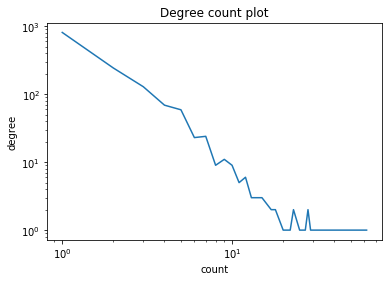

In [78]:
deg_distribution(C_2014)

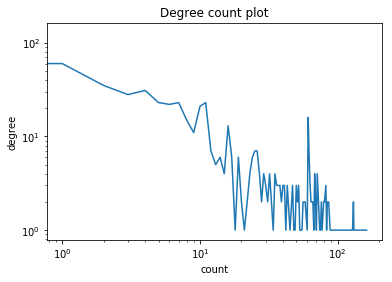

In [79]:
deg_distribution(O_2014)

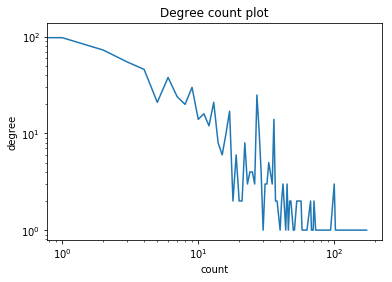

In [80]:
deg_distribution(A_2014)

Different layouts for the projected graph A was tested.

The bipartite and projected graphs exhibit a power law distribution of their degrees.

### Exploring Graph Layouts

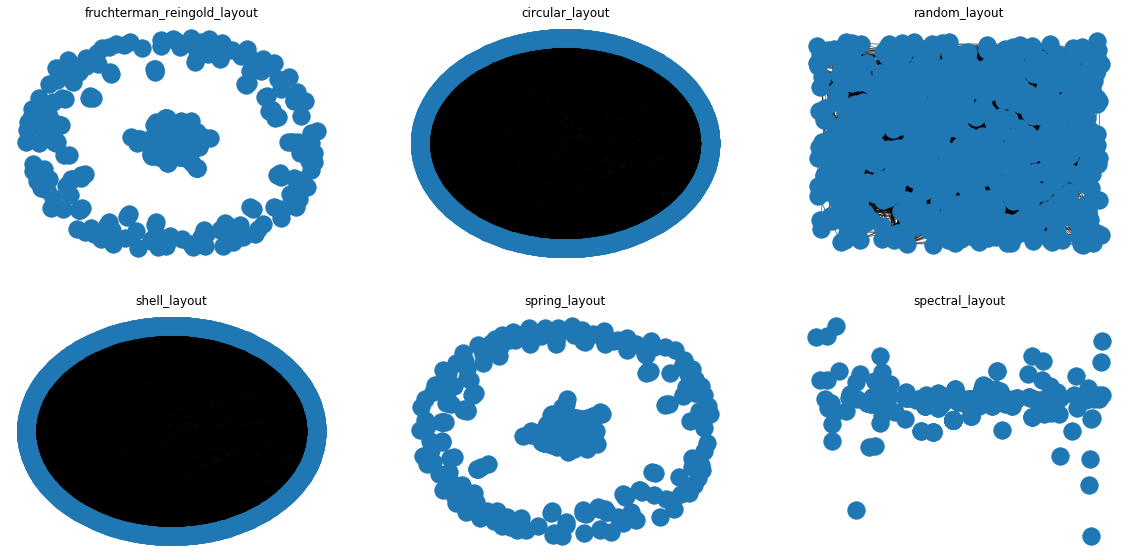

In [81]:
graph_layout(A_2014)

To be able to create Gephi visualtizations of the graph, we convert it to **gexf**

In [82]:
#Convert to gexf for Gephi
nx.write_gexf(C_2014, "C_all_IT2014.gexf")
nx.write_gexf(O_2014, "O_all_IT2014.gexf")
nx.write_gexf(A_2014, "A_all_IT2014.gexf")

### Plotting Communities

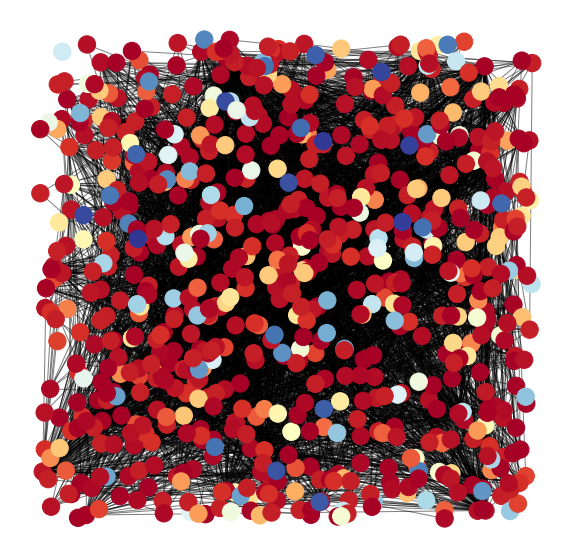

Number of Communities:  160


In [83]:
G_2014 = A_2014
partition = community.best_partition(G_2014)

plt.figure(figsize=(10,10))
plt.axis('off')
pos = nx.random_layout(G_2014)
nx.draw_networkx_nodes(G_2014, pos, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G_2014, pos, alpha=0.5)
# nx.draw_networkx_labels(G, pos)
plt.show()
print ("Number of Communities: ", len(set(partition.values())))

## 2019 Network Analysis


### Network Characteristics

Create a function that returns the quantitative characteristics of a graph like the total number of nodes, number of edges, average degree, clustering coefficient, and number of communities present.

In [59]:
graph_charac(C_2019)

Nodes:  2286
Edges:  2853
Average degree:  2.4960629921259843
Clustering Coefficient:  0.0
Number of Communities:  237


To analyze a bipartite graph, a projection of the top nodes and bottom nodes are created. The projected graph O is a network of government agencies connected if they have a corporation that was able to secure a contract from each of them. The projected graph A is a network of corporations/contractors that won a contract from the same government agency. 

In [60]:
O_2019 = bipartite.projected_graph(C_2019, top_nodes_2019)
A_2019 = bipartite.projected_graph(C_2019, bottom_nodes_2019)

In [62]:
graph_charac(A_2019)

Nodes:  1416
Edges:  7777
Average degree:  10.984463276836157
Clustering Coefficient:  0.5910427810125123
Number of Communities:  219


In [61]:
graph_charac(O_2019)

Nodes:  1017
Edges:  7988
Average degree:  15.708947885939036
Clustering Coefficient:  0.5590410856640669
Number of Communities:  213


### Network Centralities

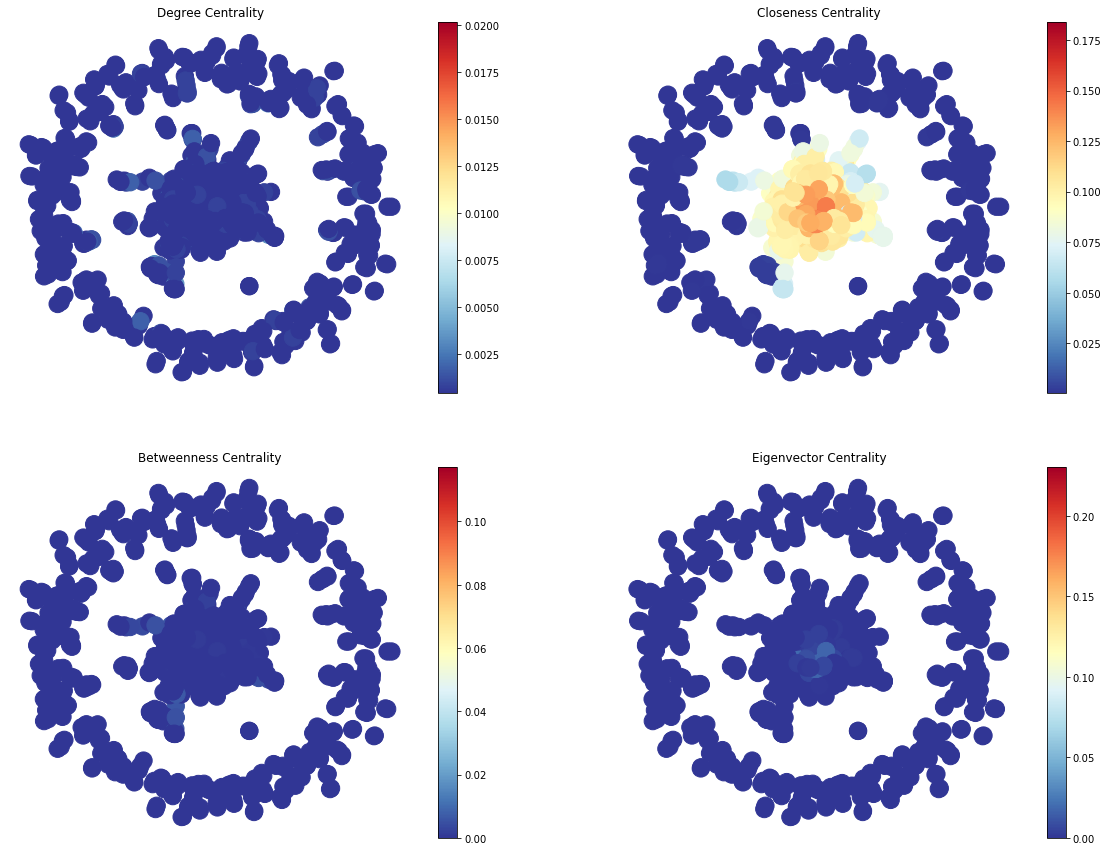

In [63]:
graph_centrality(C_2019)

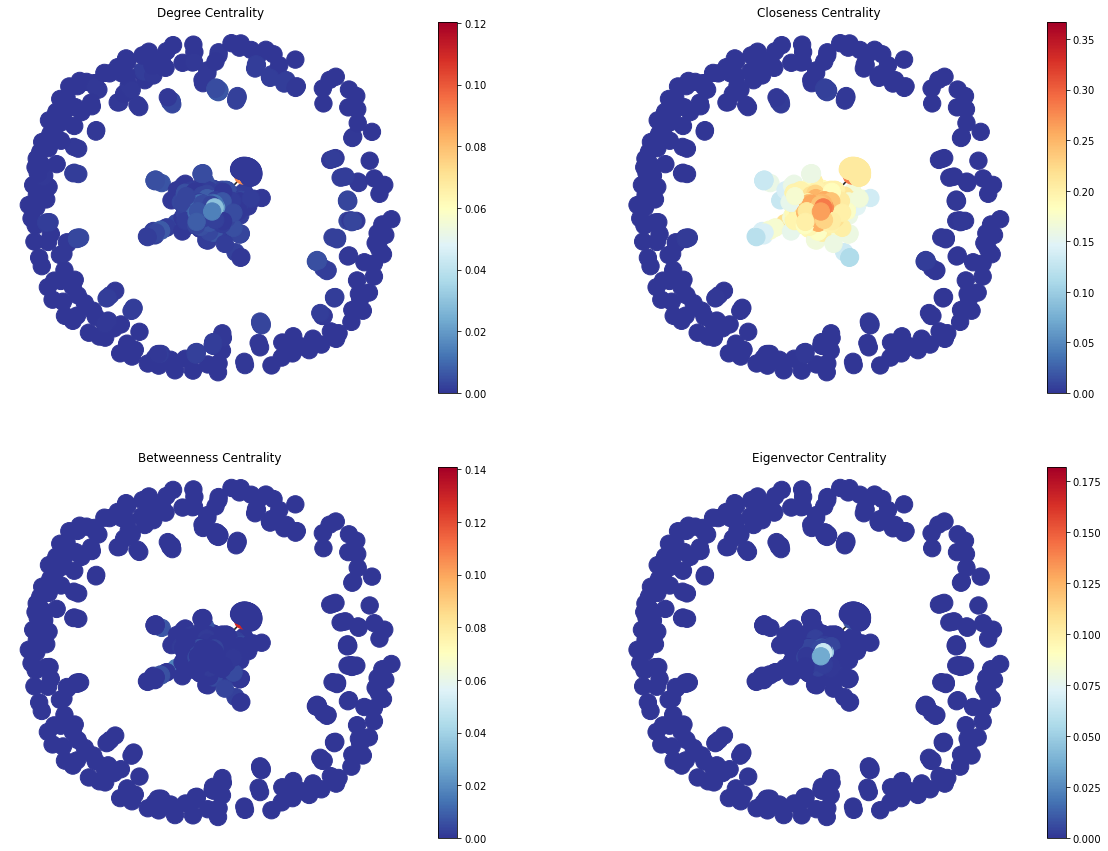

In [64]:
graph_centrality(A_2019)

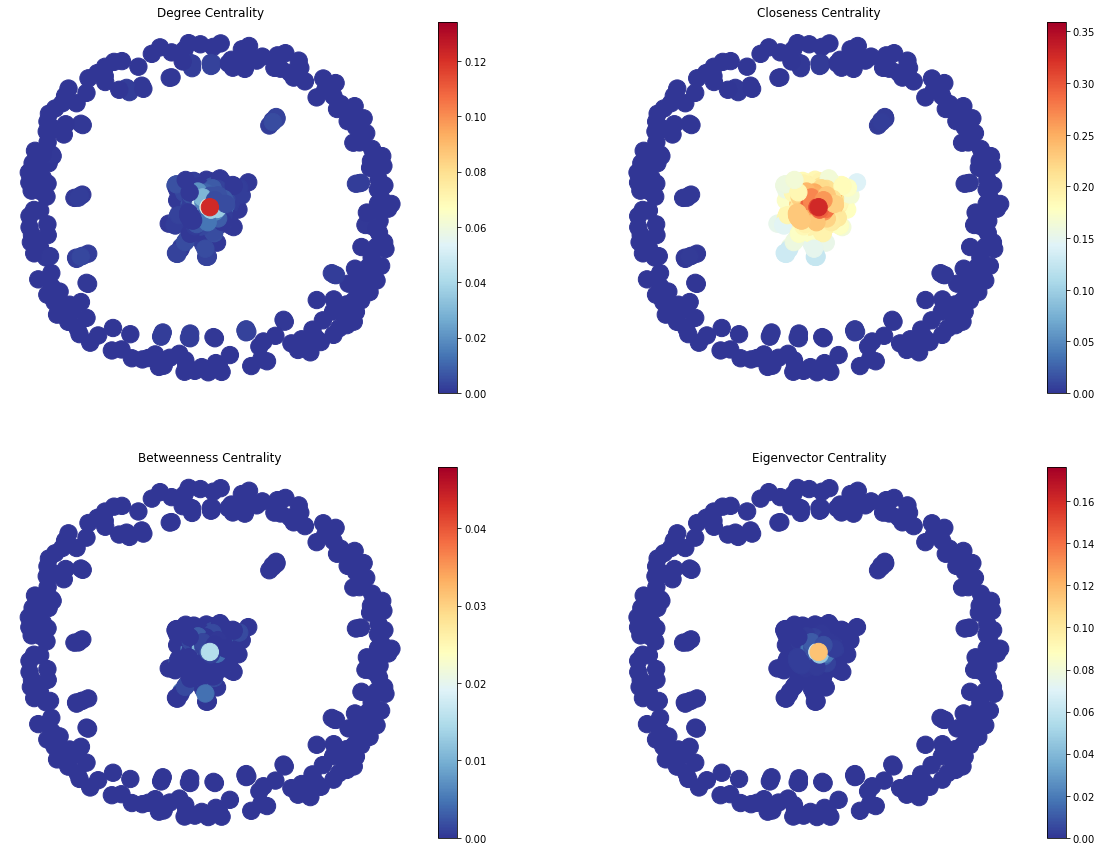

In [65]:
graph_centrality(O_2019)

### Top 20 by Network Centralities

After calculating the centralities, we rank them and get only the top 20. We then calculate the total contract amount won by the companies by contracting for the government last year.

In [66]:
top20_closeness(C_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0                           MASANGKAY COMPUTER CENTER           1.448106e+08
1                          AMERICAN TECHNOLOGIES INC.           4.199308e+07
2               FOOD AND NUTRITION RESEARCH INSTITUTE           0.000000e+00
3                                 PROCUREMENT SERVICE           4.907202e+05
4                       THE VALUE SYSTEMS PHILS. INC.           6.072362e+06
5             UNIVERSITY OF THE PHILIPPINES - DILIMAN           0.000000e+00
6            COMPUCARE CORPORATION (COMPUCARE CENTER)           1.504507e+07
7                  PHILIPPINE RICE RESEARCH INSTITUTE           0.000000e+00
8   HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...           0.000000e+00
9                         TRENDS & TECHNOLOGIES, INC.           4.688980e+08
10         SILICON VALLEY COMPUTER GROUP PHILS., INC.           5.173935e+08
11  PHILIPPINE SCIENCE HIGH SCHOOL - MIMAROPA REGI...           0.000000e+00
12  MICROGENESIS SOFTWARE, INC. DOING BUSINESS UND...           1.133337e+08
13                                     INFOWORX, INC.           6.596230e+07
14                               S1 TECHNOLOGIES INC.           2.114175e+07
15                             AVID SALES CORPORATION           1.796014e+06
16                GOVERNMENT SERVICE INSURANCE SYSTEM           0.000000e+00
17                      MAXIMUM SOLUTIONS CORPORATION           4.305727e+07
18                          BAYANPC TECHNOLOGIES INC.           3.872772e+06
19               QUARTZ BUSINESS PRODUCTS CORPORATION           2.552896e+07

In [67]:
top20_degree(C_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0                           MASANGKAY COMPUTER CENTER           1.448106e+08
1                  PHILIPPINE RICE RESEARCH INSTITUTE           0.000000e+00
2                 GOVERNMENT SERVICE INSURANCE SYSTEM           0.000000e+00
3          SILICON VALLEY COMPUTER GROUP PHILS., INC.           5.173935e+08
4   DEVELOPMENT BANK OF THE PHILIPPINES - HEAD OFFICE           0.000000e+00
5   HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...           0.000000e+00
6                          AMERICAN TECHNOLOGIES INC.           4.199308e+07
7             UNIVERSITY OF THE PHILIPPINES - DILIMAN           0.000000e+00
8                           DATAWORLD COMPUTER CENTER           4.890088e+07
9                                 PROCUREMENT SERVICE           4.907202e+05
10                   SUPREME COURT OF THE PHILIPPINES           0.000000e+00
11                        TRENDS & TECHNOLOGIES, INC.           4.688980e+08
12  MICROGENESIS SOFTWARE, INC. DOING BUSINESS UND...           1.133337e+08
13                             SOCIAL SECURITY SYSTEM           0.000000e+00
14              FOOD AND NUTRITION RESEARCH INSTITUTE           0.000000e+00
15           COMPUCARE CORPORATION (COMPUCARE CENTER)           1.504507e+07
16                  INTEGRATED COMPUTER SYSTEMS, INC.           8.022074e+07
17                        ELECTROCOMPUTER DATA SYSTEM           1.147766e+07
18                        JONECO TECH MARKETING CORP.           1.609076e+07
19                             IMAX TECHNOLOGIES INC.           1.483433e+07

In [68]:
top20_bet(C_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0                           MASANGKAY COMPUTER CENTER           1.448106e+08
1          SILICON VALLEY COMPUTER GROUP PHILS., INC.           5.173935e+08
2                  PHILIPPINE RICE RESEARCH INSTITUTE           0.000000e+00
3                         TRENDS & TECHNOLOGIES, INC.           4.688980e+08
4                                      INFOWORX, INC.           6.596230e+07
5                          AMERICAN TECHNOLOGIES INC.           4.199308e+07
6                        PHILIPPINE DUPLICATORS, INC.           2.904619e+06
7   DEPARTMENT OF HEALTH - TREATMENT AND REHABILIT...           0.000000e+00
8                           DATAWORLD COMPUTER CENTER           4.890088e+07
9   MICROGENESIS SOFTWARE, INC. DOING BUSINESS UND...           1.133337e+08
10              FOOD AND NUTRITION RESEARCH INSTITUTE           0.000000e+00
11           ILOILO SCIENCE AND TECHNOLOGY UNIVERSITY           0.000000e+00
12            UNIVERSITY OF THE PHILIPPINES - DILIMAN           0.000000e+00
13                      THE VALUE SYSTEMS PHILS. INC.           6.072362e+06
14  HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...           0.000000e+00
15        SECC COMPUTER SALES, SERVICES & ENTERPRISES           7.507003e+06
16                GOVERNMENT SERVICE INSURANCE SYSTEM           0.000000e+00
17                                PROCUREMENT SERVICE           4.907202e+05
18                            TARLAC STATE UNIVERSITY           0.000000e+00
19                               S1 TECHNOLOGIES INC.           2.114175e+07

In [69]:
top20_eigen(C_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0   HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...           0.000000e+00
1                          AMERICAN TECHNOLOGIES INC.           4.199308e+07
2                QUARTZ BUSINESS PRODUCTS CORPORATION           2.552896e+07
3                LOCAL WATER UTILITIES ADMINISTRATION           0.000000e+00
4            COMPUCARE CORPORATION (COMPUCARE CENTER)           1.504507e+07
5                    SUPREME COURT OF THE PHILIPPINES           0.000000e+00
6                  PHILIPPINE RICE RESEARCH INSTITUTE           0.000000e+00
7                 GOVERNMENT SERVICE INSURANCE SYSTEM           0.000000e+00
8             UNIVERSITY OF THE PHILIPPINES - DILIMAN           0.000000e+00
9                                 PROCUREMENT SERVICE           4.907202e+05
10                          MASANGKAY COMPUTER CENTER           1.448106e+08
11              FOOD AND NUTRITION RESEARCH INSTITUTE           0.000000e+00
12                        TRENDS & TECHNOLOGIES, INC.           4.688980e+08
13                      MAXIMUM SOLUTIONS CORPORATION           4.305727e+07
14                          BAYANPC TECHNOLOGIES INC.           3.872772e+06
15                            ADVANCE SOLUTIONS, INC.           1.774042e+08
16                               S1 TECHNOLOGIES INC.           2.114175e+07
17                      THE VALUE SYSTEMS PHILS. INC.           6.072362e+06
18             DEVELOPMENT ACADEMY OF THE PHILIPPINES           0.000000e+00
19  MICROGENESIS SOFTWARE, INC. DOING BUSINESS UND...           1.133337e+08

In [70]:
top20_closeness(A_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0                           MASANGKAY COMPUTER CENTER           1.448106e+08
1                          AMERICAN TECHNOLOGIES INC.           4.199308e+07
2                         TRENDS & TECHNOLOGIES, INC.           4.688980e+08
3            COMPUCARE CORPORATION (COMPUCARE CENTER)           1.504507e+07
4                       THE VALUE SYSTEMS PHILS. INC.           6.072362e+06
5                                S1 TECHNOLOGIES INC.           2.114175e+07
6   MICROGENESIS SOFTWARE, INC. DOING BUSINESS UND...           1.133337e+08
7                                      INFOWORX, INC.           6.596230e+07
8                              AVID SALES CORPORATION           1.796014e+06
9                           BAYANPC TECHNOLOGIES INC.           3.872772e+06
10                      MAXIMUM SOLUTIONS CORPORATION           4.305727e+07
11               QUARTZ BUSINESS PRODUCTS CORPORATION           2.552896e+07
12                              YNZAL MARKETING CORP.           3.571176e+06
13         SILICON VALLEY COMPUTER GROUP PHILS., INC.           5.173935e+08
14            TIGER CONSULTING AND SOFTWARE DEVT INC.           4.885393e+06
15                 GEODATA SYSTEMS TECHNOLOGIES, INC.           5.372430e+07
16                    ACCENT MICRO TECHNOLOGIES, INC.           1.700602e+08
17                        COLUMBIA TECHNOLOGIES, INC.           2.287856e+09
18                            ADVANCE SOLUTIONS, INC.           1.774042e+08
19                        JONECO TECH MARKETING CORP.           1.609076e+07

In [71]:
top20_degree(A_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0                         TRENDS & TECHNOLOGIES, INC.           4.688980e+08
1                           MASANGKAY COMPUTER CENTER           1.448106e+08
2                          AMERICAN TECHNOLOGIES INC.           4.199308e+07
3            COMPUCARE CORPORATION (COMPUCARE CENTER)           1.504507e+07
4                                 PROCUREMENT SERVICE           4.907202e+05
5                QUARTZ BUSINESS PRODUCTS CORPORATION           2.552896e+07
6                       THE VALUE SYSTEMS PHILS. INC.           6.072362e+06
7                               YNZAL MARKETING CORP.           3.571176e+06
8                       MAXIMUM SOLUTIONS CORPORATION           4.305727e+07
9                                S1 TECHNOLOGIES INC.           2.114175e+07
10                        COLUMBIA TECHNOLOGIES, INC.           2.287856e+09
11                          BAYANPC TECHNOLOGIES INC.           3.872772e+06
12  MICROGENESIS SOFTWARE, INC. DOING BUSINESS UND...           1.133337e+08
13                      INFOBAHN COMMUNICATIONS, INC.           4.132089e+07
14                                     INFOWORX, INC.           6.596230e+07
15                            ADVANCE SOLUTIONS, INC.           1.774042e+08
16                    ACCENT MICRO TECHNOLOGIES, INC.           1.700602e+08
17                          EPARTNERS SOLUTIONS, INC.           6.958710e+06
18                                          PLDT INC.           7.775603e+07
19                 GEODATA SYSTEMS TECHNOLOGIES, INC.           5.372430e+07

In [72]:
top20_bet(A_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0                           MASANGKAY COMPUTER CENTER           1.448106e+08
1                                 PROCUREMENT SERVICE           4.907202e+05
2                          AMERICAN TECHNOLOGIES INC.           4.199308e+07
3          SILICON VALLEY COMPUTER GROUP PHILS., INC.           5.173935e+08
4                         TRENDS & TECHNOLOGIES, INC.           4.688980e+08
5                                      INFOWORX, INC.           6.596230e+07
6                        PHILIPPINE DUPLICATORS, INC.           2.904619e+06
7                       THE VALUE SYSTEMS PHILS. INC.           6.072362e+06
8   MICROGENESIS SOFTWARE, INC. DOING BUSINESS UND...           1.133337e+08
9                           DATAWORLD COMPUTER CENTER           4.890088e+07
10            TIGER CONSULTING AND SOFTWARE DEVT INC.           4.885393e+06
11                 GEODATA SYSTEMS TECHNOLOGIES, INC.           5.372430e+07
12                LGT TRADING AND GENERAL MERCHANDISE           2.763795e+06
13                               S1 TECHNOLOGIES INC.           2.114175e+07
14         TOUCHMEDIA SUPPLY AND SERVICES CORPORATION           8.400000e+06
15           COMPUCARE CORPORATION (COMPUCARE CENTER)           1.504507e+07
16                        COLUMBIA TECHNOLOGIES, INC.           2.287856e+09
17                      MAXIMUM SOLUTIONS CORPORATION           4.305727e+07
18        SECC COMPUTER SALES, SERVICES & ENTERPRISES           7.507003e+06
19                                          PLDT INC.           7.775603e+07

In [73]:
top20_eigen(A_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0            COMPUCARE CORPORATION (COMPUCARE CENTER)           1.504507e+07
1                          AMERICAN TECHNOLOGIES INC.           4.199308e+07
2                               YNZAL MARKETING CORP.           3.571176e+06
3                         TRENDS & TECHNOLOGIES, INC.           4.688980e+08
4                QUARTZ BUSINESS PRODUCTS CORPORATION           2.552896e+07
5                       THE VALUE SYSTEMS PHILS. INC.           6.072362e+06
6                           BAYANPC TECHNOLOGIES INC.           3.872772e+06
7                                S1 TECHNOLOGIES INC.           2.114175e+07
8                       MAXIMUM SOLUTIONS CORPORATION           4.305727e+07
9                             ADVANCE SOLUTIONS, INC.           1.774042e+08
10                        COLUMBIA TECHNOLOGIES, INC.           2.287856e+09
11                             AVID SALES CORPORATION           1.796014e+06
12                          EPARTNERS SOLUTIONS, INC.           6.958710e+06
13  MICROGENESIS SOFTWARE, INC. DOING BUSINESS UND...           1.133337e+08
14                         CD TECHNOLOGIES ASIA, INC.           1.418295e+06
15                      INFOBAHN COMMUNICATIONS, INC.           4.132089e+07
16                    ACCENT MICRO TECHNOLOGIES, INC.           1.700602e+08
17                      UNISON COMPUTER SYSTEMS, INC.           3.990982e+07
18                                        EPLDT, INC.           2.774479e+07
19                                          PLDT INC.           7.775603e+07

In [74]:
top20_closeness(O_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0               FOOD AND NUTRITION RESEARCH INSTITUTE                    0.0
1             UNIVERSITY OF THE PHILIPPINES - DILIMAN                    0.0
2   DEPARTMENT OF HEALTH - TREATMENT AND REHABILIT...                    0.0
3                  PHILIPPINE RICE RESEARCH INSTITUTE                    0.0
4   HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...                    0.0
5                 GOVERNMENT SERVICE INSURANCE SYSTEM                    0.0
6                      CENTRAL LUZON STATE UNIVERSITY                    0.0
7                DEPARTMENT OF AGRICULTURE - REGION X                    0.0
8                             BATAAN GENERAL HOSPITAL                    0.0
9       PHILIPPINE HEALTH INSURANCE CORPORATION - NCR                    0.0
10                     DEPARTMENT OF EDUCATION - MAIN                    0.0
11                            TARLAC STATE UNIVERSITY                    0.0
12       ENVIRONMENTAL MANAGEMENT BUREAU - REGION III                    0.0
13  PHILIPPINE SCIENCE HIGH SCHOOL - MIMAROPA REGI...                    0.0
14                          DAVAO CITY WATER DISTRICT                    0.0
15               LOCAL WATER UTILITIES ADMINISTRATION                    0.0
16  NATIONAL ECONOMIC AND DEVELOPMENT AUTHORITY - ...                    0.0
17                                PROCUREMENT SERVICE               490720.2
18             MANILA INTERNATIONAL AIRPORT AUTHORITY                    0.0
19                   SUPREME COURT OF THE PHILIPPINES                    0.0

In [75]:
top20_degree(O_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0               FOOD AND NUTRITION RESEARCH INSTITUTE                    0.0
1                  PHILIPPINE RICE RESEARCH INSTITUTE                    0.0
2             UNIVERSITY OF THE PHILIPPINES - DILIMAN                    0.0
3   HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...                    0.0
4                    SUPREME COURT OF THE PHILIPPINES                    0.0
5                                 PROCUREMENT SERVICE               490720.2
6                LOCAL WATER UTILITIES ADMINISTRATION                    0.0
7   DEPARTMENT OF HEALTH - TREATMENT AND REHABILIT...                    0.0
8                 GOVERNMENT SERVICE INSURANCE SYSTEM                    0.0
9   PHILIPPINE SCIENCE HIGH SCHOOL - MIMAROPA REGI...                    0.0
10  NATIONAL ECONOMIC AND DEVELOPMENT AUTHORITY - ...                    0.0
11             DEVELOPMENT ACADEMY OF THE PHILIPPINES                    0.0
12            PHILIPPINE HEALTH INSURANCE CORPORATION                    0.0
13              OFFICE OF THE OMBUDSMAN - MAIN OFFICE                    0.0
14                          DAVAO CITY WATER DISTRICT                    0.0
15                     CENTRAL LUZON STATE UNIVERSITY                    0.0
16                        DEPARTMENT OF HEALTH - MAIN                    0.0
17                            TARLAC STATE UNIVERSITY                    0.0
18                            BATAAN GENERAL HOSPITAL                    0.0
19       ENVIRONMENTAL MANAGEMENT BUREAU - REGION III                    0.0

In [76]:
top20_bet(O_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0                  PHILIPPINE RICE RESEARCH INSTITUTE                    0.0
1   DEPARTMENT OF HEALTH - TREATMENT AND REHABILIT...                    0.0
2   PHILIPPINE SCIENCE HIGH SCHOOL - MIMAROPA REGI...                    0.0
3            ILOILO SCIENCE AND TECHNOLOGY UNIVERSITY                    0.0
4                           DAVAO CITY WATER DISTRICT                    0.0
5                                    BICOL UNIVERSITY                    0.0
6               FOOD AND NUTRITION RESEARCH INSTITUTE                    0.0
7                DEPARTMENT OF AGRICULTURE - REGION X                    0.0
8             UNIVERSITY OF THE PHILIPPINES - DILIMAN                    0.0
9                             TARLAC STATE UNIVERSITY                    0.0
10  DEPARTMENT OF PUBLIC WORKS AND HIGHWAYS - QUEZ...                    0.0
11                                PROCUREMENT SERVICE               490720.2
12            CITY OF GENERAL SANTOS , SOUTH COTABATO                    0.0
13  DEPARTMENT OF ENVIRONMENT AND NATURAL RESOURCE...                    0.0
14                              CITY OF MANDAUE, CEBU                    0.0
15  HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...                    0.0
16                      ZAMBOANGA CITY MEDICAL CENTER                    0.0
17                GOVERNMENT SERVICE INSURANCE SYSTEM                    0.0
18                    MARIANO MARCOS STATE UNIVERSITY                    0.0
19            DEPARTMENT OF AGRICULTURE - REGION VIII                    0.0

In [77]:
top20_bet(O_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0                  PHILIPPINE RICE RESEARCH INSTITUTE                    0.0
1   DEPARTMENT OF HEALTH - TREATMENT AND REHABILIT...                    0.0
2   PHILIPPINE SCIENCE HIGH SCHOOL - MIMAROPA REGI...                    0.0
3            ILOILO SCIENCE AND TECHNOLOGY UNIVERSITY                    0.0
4                           DAVAO CITY WATER DISTRICT                    0.0
5                                    BICOL UNIVERSITY                    0.0
6               FOOD AND NUTRITION RESEARCH INSTITUTE                    0.0
7                DEPARTMENT OF AGRICULTURE - REGION X                    0.0
8             UNIVERSITY OF THE PHILIPPINES - DILIMAN                    0.0
9                             TARLAC STATE UNIVERSITY                    0.0
10  DEPARTMENT OF PUBLIC WORKS AND HIGHWAYS - QUEZ...                    0.0
11                                PROCUREMENT SERVICE               490720.2
12            CITY OF GENERAL SANTOS , SOUTH COTABATO                    0.0
13  DEPARTMENT OF ENVIRONMENT AND NATURAL RESOURCE...                    0.0
14                              CITY OF MANDAUE, CEBU                    0.0
15  HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...                    0.0
16                      ZAMBOANGA CITY MEDICAL CENTER                    0.0
17                GOVERNMENT SERVICE INSURANCE SYSTEM                    0.0
18                    MARIANO MARCOS STATE UNIVERSITY                    0.0
19            DEPARTMENT OF AGRICULTURE - REGION VIII                    0.0

In [78]:
x = nx.degree_centrality(C_2019)
{k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}

{'MASANGKAY COMPUTER CENTER': 0.02013129102844639,
 'PHILIPPINE RICE RESEARCH INSTITUTE': 0.01487964989059081,
 'GOVERNMENT SERVICE INSURANCE SYSTEM': 0.013129102844638951,
 'SILICON VALLEY COMPUTER GROUP PHILS., INC.': 0.01225382932166302,
 'DEVELOPMENT BANK OF THE PHILIPPINES - HEAD OFFICE': 0.011816192560175055,
 'HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQUARTERS': 0.011816192560175055,
 'AMERICAN TECHNOLOGIES INC.': 0.01137855579868709,
 'UNIVERSITY OF THE PHILIPPINES - DILIMAN': 0.01050328227571116,
 'DATAWORLD COMPUTER CENTER': 0.01050328227571116,
 'PROCUREMENT SERVICE': 0.00962800875273523,
 'SUPREME COURT OF THE PHILIPPINES': 0.00962800875273523,
 'TRENDS & TECHNOLOGIES, INC.': 0.00962800875273523,
 'MICROGENESIS SOFTWARE, INC. DOING BUSINESS UNDER THE NAME AND STYLE OF MICROGENESIS BUSINESS SYSTEMS': 0.00962800875273523,
 'SOCIAL SECURITY SYSTEM': 0.009190371991247266,
 'FOOD AND NUTRITION RESEARCH INSTITUTE': 0.0087527352297593,
 'COMPUCARE CORPORATION (COMPUCARE CENTER)

In [79]:
data_2019.loc[data_2019['Awardee Corporate Title']=='MASANGKAY COMPUTER CENTER']

Organization Name  \
23658   PHILIPPINE SCIENCE HIGH SCHOOL - CALABARZON RE...   
26438    NATIONAL IRRIGATION ADMINISTRATION - REGION IV-B   
26439    NATIONAL IRRIGATION ADMINISTRATION - REGION IV-B   
29250          PHILIPPINE SCIENCE HIGH SCHOOL - REGION XI   
33632                      CENTRAL LUZON STATE UNIVERSITY   
...                                                   ...   
825621  DEPARTMENT OF ENVIRONMENT AND NATURAL RES. - P...   
854779  DEPARTMENT OF ENVIRONMENT AND NATURAL RES. - P...   
888444  DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...   
891189         PHILIPPINE SCIENCE HIGH SCHOOL - REGION XI   
946890  DEPARTMENT OF ENVIRONMENT AND NATURAL RES. - R...   

                                             Notice Title  \
23658   INVITATION TO BID FOR THE PROCUREMENT OF SOFTW...   
26438   Supply and Delivery of IT Equipments, Lot 1 & ...   
26439   Supply and Delivery of IT Equipments, Lot 1 & ...   
29250   INVITATION TO BID  Negotiated Procurement of  ...   
33632                            RFQ Laptop for CHSI-DTGT   
...                                                   ...   
825621  PROCUREMENT OF TWENTY-TWO (22) DESKTOP COMPUTE...   
854779  Procurement of Information Communication Techn...   
888444  PURCHASE OF LAPTOPS FOR THE LISTAHANAN 3 ASSES...   
891189  INVITATION TO BID  PROCUREMENT OF ADDITIONAL I...   
946890  INVITATION TO BID FOR PURCHASE OF VARIOUS INFO...   

          Awardee Corporate Title  Contract Amount  
23658   MASANGKAY COMPUTER CENTER        3944068.0  
26438   MASANGKAY COMPUTER CENTER        1359998.0  
26439   MASANGKAY COMPUTER CENTER         284998.0  
29250   MASANGKAY COMPUTER CENTER        1473805.0  
33632   MASANGKAY COMPUTER CENTER         117600.0  
...                           ...              ...  
825621  MASANGKAY COMPUTER CENTER        1365184.0  
854779  MASANGKAY COMPUTER CENTER        2325645.0  
888444  MASANGKAY COMPUTER CENTER        2032050.0  
891189  MASANGKAY COMPUTER CENTER        1068808.0  
946890  MASANGKAY COMPUTER CENTER        1658888.0  

[71 rows x 4 columns]

In [80]:
df_final_2019.loc[df_final_2019['Awardee Corporate Title']=='MASANGKAY COMPUTER CENTER'].sort_values(by=['weight'])

Organization Name  \
1048  DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...   
2758            UNIVERSITY OF THE PHILIPPINES - DILIMAN   
1049  DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...   
1053  DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...   
1179        ENVIRONMENTAL MANAGEMENT BUREAU - CAR, DENR   
1188       ENVIRONMENTAL MANAGEMENT BUREAU - REGION III   
1448             MANILA INTERNATIONAL AIRPORT AUTHORITY   
1560               MUNICIPALITY OF BANGUI, ILOCOS NORTE   
1832  NATIONAL CONCILIATION AND MEDIATION BOARD - RE...   
1932                         NATIONAL POLICE COMMISSION   
1939              NATIONAL STATISTICS OFFICE - REGION I   
1991   NUEVA ECIJA UNIVERSITY OF SCIENCE AND TECHNOLOGY   
2157      PHILIPPINE HEALTH INSURANCE CORPORATION - NCR   
2567      RESEARCH INSTITUTE FOR TROPICAL MEDICINE, DOH   
2628                    SOUTHERN LEYTE STATE UNIVERSITY   
2717                 UNIVERSITY OF NORTHERN PHILIPPINES   
1047  DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...   
1038  DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...   
2829  WEST VISAYAS STATE UNIVERSITY MEDICAL CENTER -...   
582                 COMMISSION ON AUDIT - COTABATO CITY   
262            CAVITE STATE UNIVERSITY - ROSARIO CAMPUS   
886   DEPARTMENT OF HEALTH - TREATMENT AND REHABILIT...   
599                             COMMISSION ON ELECTIONS   
620                           DAVAO CITY WATER DISTRICT   
467                                       CITY OF PASIG   
661                   DEPARTMENT OF AGRICULTURE - CARFU   
158                  BULACAN AGRICULTURAL STATE COLLEGE   
771   DEPARTMENT OF ENVIRONMENT AND NATURAL RES. - P...   
780   DEPARTMENT OF ENVIRONMENT AND NATURAL RES. - P...   
794   DEPARTMENT OF ENVIRONMENT AND NATURAL RES. - P...   
115                            BATANES GENERAL HOSPITAL   
681   DEPARTMENT OF AGRICULTURE - REGION IV-B (MIMAR...   
155         BOHOL ISLAND STATE UNIVERSITY - MAIN CAMPUS   
2324         PHILIPPINE SCIENCE HIGH SCHOOL - REGION XI   
2307  PHILIPPINE SCIENCE HIGH SCHOOL - CALABARZON RE...   
297                      CENTRAL LUZON STATE UNIVERSITY   
928    DEPARTMENT OF LABOR AND EMPLOYMENT - REGION IV-B   
1897   NATIONAL IRRIGATION ADMINISTRATION - REGION IV-B   
1475                          MARIVELES MENTAL HOSPITAL   
1209              FOOD AND NUTRITION RESEARCH INSTITUTE   
815   DEPARTMENT OF ENVIRONMENT AND NATURAL RES. - R...   
1456                    MARIANO MARCOS STATE UNIVERSITY   
446                                  CITY OF MUNTINLUPA   
2320  PHILIPPINE SCIENCE HIGH SCHOOL - MIMAROPA REGI...   
110                             BATAAN GENERAL HOSPITAL   
702             DEPARTMENT OF AGRICULTURE - REGION VIII   

        Awardee Corporate Title  weight  
1048  MASANGKAY COMPUTER CENTER       1  
2758  MASANGKAY COMPUTER CENTER       1  
1049  MASANGKAY COMPUTER CENTER       1  
1053  MASANGKAY COMPUTER CENTER       1  
1179  MASANGKAY COMPUTER CENTER       1  
1188  MASANGKAY COMPUTER CENTER       1  
1448  MASANGKAY COMPUTER CENTER       1  
1560  MASANGKAY COMPUTER CENTER       1  
1832  MASANGKAY COMPUTER CENTER       1  
1932  MASANGKAY COMPUTER CENTER       1  
1939  MASANGKAY COMPUTER CENTER       1  
1991  MASANGKAY COMPUTER CENTER       1  
2157  MASANGKAY COMPUTER CENTER       1  
2567  MASANGKAY COMPUTER CENTER       1  
2628  MASANGKAY COMPUTER CENTER       1  
2717  MASANGKAY COMPUTER CENTER       1  
1047  MASANGKAY COMPUTER CENTER       1  
1038  MASANGKAY COMPUTER CENTER       1  
2829  MASANGKAY COMPUTER CENTER       1  
582   MASANGKAY COMPUTER CENTER       1  
262   MASANGKAY COMPUTER CENTER       1  
886   MASANGKAY COMPUTER CENTER       1  
599   MASANGKAY COMPUTER CENTER       1  
620   MASANGKAY COMPUTER CENTER       1  
467   MASANGKAY COMPUTER CENTER       1  
661   MASANGKAY COMPUTER CENTER       1  
158   MASANGKAY COMPUTER CENTER       1  
771   MASANGKAY COMPUTER CENTER       1  
780   MASANGKAY COMPUTER CENTER       1  
794 

### Degree Distribution

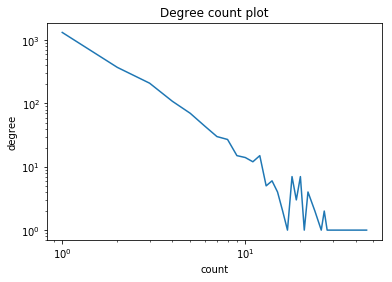

In [81]:
deg_distribution(C_2019)

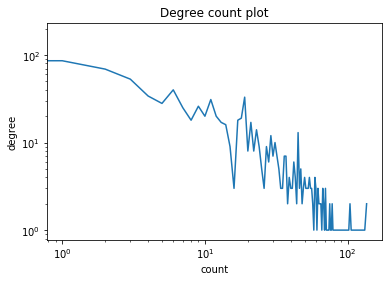

In [82]:
deg_distribution(O_2019)

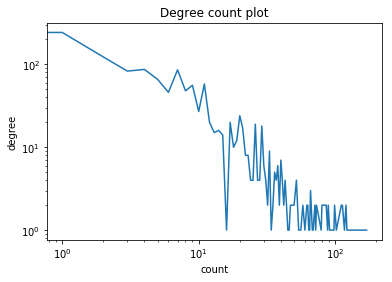

In [83]:
deg_distribution(A_2019)

Different layouts for the projected graph A was tested.

The bipartite and projected graphs exhibit a power law distribution of their degrees.

### Exploring Graph Layouts

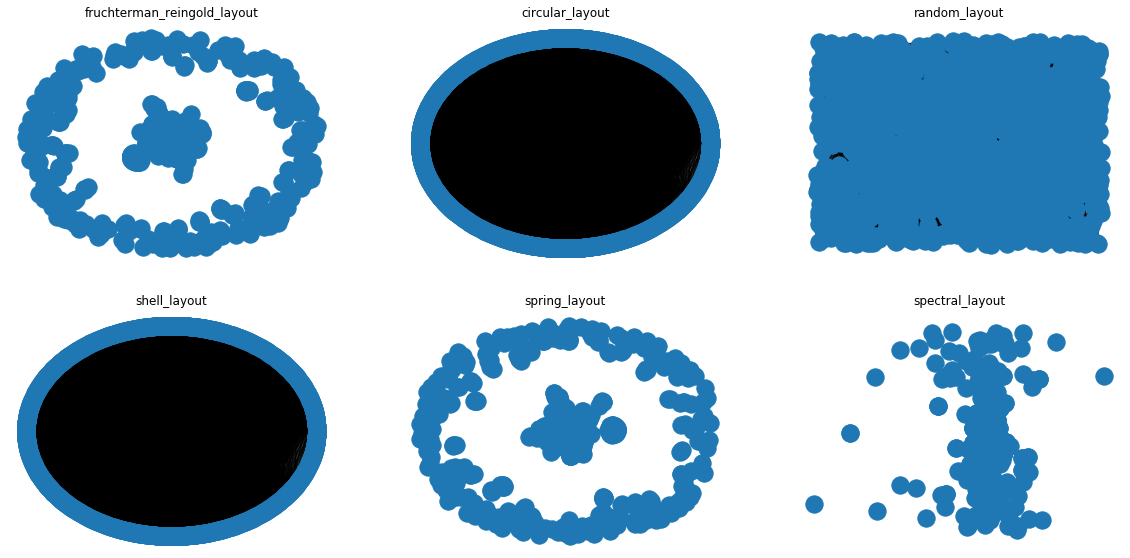

In [84]:
graph_layout(A_2019)

To be able to create Gephi visualtizations of the graph, we convert it to **gexf**

In [85]:
#Convert to gexf for Gephi
nx.write_gexf(C_2019, "C_all_IT2019.gexf")
nx.write_gexf(O_2019, "O_all_IT2019.gexf")
nx.write_gexf(A_2019, "A_all_IT2019.gexf")

### Plotting Communities

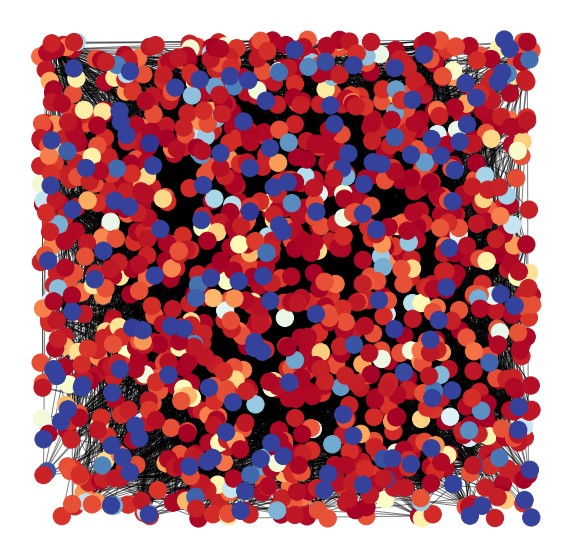

Number of Communities:  221


In [86]:
G_2019 = A_2019
partition = community.best_partition(G_2019)

plt.figure(figsize=(10,10))
plt.axis('off')
pos = nx.random_layout(G_2019)
nx.draw_networkx_nodes(G_2019, pos, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G_2019, pos, alpha=0.5)
# nx.draw_networkx_labels(G, pos)
plt.show()
print ("Number of Communities: ", len(set(partition.values())))

# Discussion of Results

## Bipartite Network


Table 1: Bipartite Network Properties

| Metric                    | 2014  | 2019  |
|---------------------------|-------|-------|
| No. of Nodes              | 1,424 | 2,286 |
| No. of Edges              | 1,769 | 2,853 |
| Average Unweighted Degree | 2.49  | 2.50  |
| Average Weighted Degree   | 6.76  | 5.15  |
| Clustering Coefficients   | 0.0   | 0.0   |
| Diameter                  | 17    | 20    |
| No. of Communities        | 177   | 237   |

In Table 1, we present the descriptive statistics of the bipartite graphs constructed from 2014 and 2019. These helped us see the structure of the networks and the changes in the properties for both periods. 

We inspect an increase in the number of nodes which signify the increase in the number of actors in the network composed of different unique Government Organizations and Corporate Awardees. We also inspect an increase in the number of edges which signify the increase in the number of projects from 2014 to 2019. This is intuitive given the context of growth of the Philippine economy and also the increase in the number of government projects like those under the “Build Build Build” umbrella under the 2016-2022 administration. 
	
As seen in Figure 3, we see that both networks’ degree distribution observes a power law and suggests that both are scale-free graphs. Our analysis also shows that the average degree between the two eras remain unmoved at approximately 2.50 degrees. This unweighted degree signifies the number of unique corporate awardee that are connected to a government organization. It is interesting to see that this property remains unchanged. 

However, we do not observe the similar trend when looking at the average weighted degree. The average weighted degree decreased from 6.76 to 5.15. Given that the number of unique corporate awardee remained constant, this means that on average government organization to corporation interactions are less repeated. However, we can only speculate the meaning of this observation. This may suggest that there is less preference to a current supplier or there is a high level of competition between firms. It can also suggest a more efficient system that requires less repeat orders.

With the increase in the number of nodes and the edges, we also see an increase in the diameter or the longest shortest path in the network. This shows the expanding network of government procurement. We also observed an increase in the number of communities in the network which shows that the growth of the network is not just limited to the growth of the existing communities but also the emergence of new communities following the growth of the network.

We used Degree Centrality to reveal the most important actors in the network and compared the changes in position. We saw that 5 out of 10 of the actors remain in the top 10 most important nodes. 

The most notable actor is Masangkay Computer Center which maintained its position as the most important node with the highest degree centrality. This shows a sustained dominance of one company in serving many government organizations. This shows a possible preferential awarding of the public sector to Masangkay Computer Center. This preference may come from the company's excellent service, competitive pricing, or unique services. It can show the entrepreneurial success of the company that can be used as a role model by other entrepreneurs or it can also be a sign of anomalous behavior. These possible insights are purely speculative currently. What is certain is their importance in the procurement network in supporting many government organizations.

Another notable insight is the Philippine Rice Research Institute which ranked 2nd in 2019 from not being in the Top 10 in 2014. This high rank in importance shows the increase in activity of the government organization that can be explained by an increase in strategic focus of the government, an increase in budget, or a change in leadership. 

Using degree centrality, we were able to show the important actors in the network. This can be used by the government to see anomalies by comparing the insights of the network to what they are expecting from the approved budgets and strategic initiatives of the government. This analysis can be improved by looking at a more granular annual comparison to track the movements in rankings more closely.


## Corporate Awardee Projected Network

Table 2: Projected Corporate Awardees Network Properties
   
| Metric                 | 2014  | 2019  |
|------------------------|-------|-------|
| No. of Nodes           | 777   | 1,416 |
| No. of Edges           | 4,705 | 7,771 |
| Average Degree         | 12.11 | 10.98 |
| Clustering Coefficient | 0.60  | 0.59  |
| Diameter               | 8     | 10    |
| No. of Communities     | 161   | 219   |

In Table 2, we present the descriptive statistics of the projected network of corporate awardees from 2014 and 2019. These projections have corporate awardees as nodes and similarities in government organization served as edges. These helped us see the structure of the networks and the changes in the properties for both periods. The analysis of the projected network is different because the edges do not signify an awarded project from one node to another. The edge in the projected graph is created when two corporations receive projects from the same government organization. 

Following the increase in the size of the bipartite network, we also see an 80% increase in the number of nodes which signify the increase in the number of actors in the network which shows that there are now more corporations serving the public sector. We also see a 65% increase in the number of edges which signify the increase in the number of shared relationships with government agencies. It is interesting to note the lower increase in edges compared to the increase in nodes. Overall, we saw that the projected network also grew when looking at the diameter.
As seen in Figure 3, we see that both networks’ degree distributions are close to a power law distribution. Both of the degree distributions are noisy and have drops in value in between. Our analysis also shows that the average degree between the two eras decreased from 12.11 to 10.98. This signifies that on average a corporation in 2019 has less shared connections than in 2014.

The clustering coefficient decreased from 0.60 to 0.59. This means that the corporations are now less clustered but by a small margin only. The value of the clustering coefficient is above 0.5 which shows that the network is highly clustered. We also observed that more communities have emerged going into 2019.

We used Degree Centrality to reveal the most important actors in the network and compared the changes in position. We saw that 5 out of 10 of the actors remain in the top 10 most important nodes. The importance in this network reveals corporations who serve a lot of government organizations that are also served by other corporations.

Further analysis must be done to see if these corporations have the same or different product offerings. For our analysis, we assume that they have similar offerings since we have limited our analysis on Information Technology specifically. We see in the rankings that similar to the bipartite networks analysis, we still see Masangkay Computer Center as an important actor. This tells us that the government organizations awarding projects to Masangkay Computer Center also award projects to others. It tells us that government organizations do not prefer to have Masangkay Computer Center as their sole supplier for any Information Technology requirements because its connection is shared with a lot of other corporations. This can be interpreted as the robustness of the network since we can say that government organizations are exposed to multiple corporations when it comes to Information Technology. This can also tell us the level of either or a combination of collaboration and competition amongst Information Technology goods and service providers.

## Government Organization Projected Network

Table 3: Projected Government Organizations Network Properties

| Metric                 | 2014  | 2019  |
|------------------------|-------|-------|
| No. of Nodes           | 647   | 1,017 |
| No. of Edges           | 5,994 | 7,988 |
| Average Degree         | 18.53 | 15.71 |
| Clustering Coefficient | 0.54  | 0.56  |
| Diameter               | 8     | 9     |
| No. of Communities     | 159   | 213   |

In Table 3, we present the descriptive statistics of the projected network of government organizations from 2014 and 2019. These projections have government organizations as nodes and similarities in corporations awarded as edges. These helped us see the structure of the networks and the changes in the properties for both periods. The analysis of the projected network of government organizations is similar to the corporate awardees where edges do not signify an awarded project from one node to another. The edge in the projected graph is created when two government organizations award projects to the same corporation. 

Following the increase in the size of the bipartite network, we also see an 57% increase in the number of nodes which signify the increase in the number of actors in the network which shows that there are now more government organizations in the PhilGEPS system and awarding projects to corporations. We also see a 33% increase in the number of edges which signify the increase in the number of shared relationships with corporations. It is interesting to note the lower increase in edges compared to the increase in nodes. Overall, we saw that the projected network also grew when looking at the diameter.
As seen in Figure 5, we see that both networks’ degree distributions are close to a power law distribution. Both of the degree distributions are noisy and have rises and drops in value in between. Our analysis also shows that the average degree between the two eras decreased significantly from 18.53 to 15.71. This signifies that on average a corporation in 2019 has less shared connections than in 2014. We see that government organizations now have less similarities with each other.

The clustering coefficient increased from 0.54 to 0.56.  This means that the corporations are now more clustered but by a small margin only. The value of the clustering coefficient is above 0.5 which shows that the network is highly clustered. We also observed that more communities have emerged going into 2019.

We used Degree Centrality to reveal the most important actors in the network and compared the changes in position. We saw that 3 out of 10 of the actors remain in the top 10 most important nodes. This is less than what we found in the bipartite network and corporate awardee projection network. The importance in this network reveals corporations who serve a lot of government organizations that are also served by other corporations.

Further analysis must be done to see if these government organizations are awarding projects that have the same or different goods or services. For our analysis, we assume that they have similar offerings since we have limited our analysis on Information Technology specifically. This insight can help the government offices benchmark themselves against other winning bids for both budget planning and project awarding. This can also be used as leverage for procurement planning and aid collaboration between government organizations to get better bids and agreements and increase the procurement system efficiency.


# Conclusion

This paper analyzed the network of  Government Organizations and Corporate Awardees for IT projects in 2014 and 2019. The analysis reveals that the network has changed and grew comparing 2014 and 2019. Using degree centrality in the bipartite network, we have identified key actors among corporations and government agencies. The degree centrality for the projected networks for corporate awardees were also compared in 2014 and 2019. It reveals that the top corporations that serve shared government organizations were almost the same in 2014 and 2019. These are the dominant companies serving the IT needs of the government. 

This work can provide an initial model of the network of government procurement and understand the nature of past projects. It could help the Commission on Audit to scrutinize the awarded contracts in each government agency or for each business category. This paper also identified dominant companies that secure contracts with the government, it could help in promoting good governance by ensuring fair practices in Government Bids and Awards. The study can also guide businesses who want to enter partnerships with the government as it would reveal areas of least competition, underserved government agencies, and dominant companies. Lastly, the study can be utilized by the government in making more informed policies that ultimately improve how it spends its budget.


# Acknowledgements

We would like to thank the Philippine Government Electronic Procurement System (PhilGEPS) for making the data publicly available for us to analyze. We wish to express our gratitude to our Network Science professors at the Asian Institute of Management, Prof. Erika Fille Legara, Prof. Christopher Monterola, Prof. Felix Valenzuela, and our guest lecturer  from the National University of Singapore (NUS), Dr. Feng Ling.

# References

    [1] About PhilGEPS. (n.d.). Retrieved March 25, 2020, from https://www.philgeps.gov.ph/GEPSNONPILOT/ aboutGEPS/aboutGEPS.aspx?menuIndex=5
    [2] Chowdhury N., Chen, P., & Tiong, R. L. (2011). Analysing the structure of public–private partnership projects using network theory. Construction Management and Economics, 29(3), 247-260. doi:10.1080/01446193.2010.537354
    [3] Fazekas, M., Skuhrovec, J., & Wachs, J. (2017). Corruption, Government Turnover, and Public Contracting Market Structure Insights Using Network Analysis and Objective Corruption Proxies. SSRN Electronic Journal. doi:10.2139/ssrn.3103402
    [4] Mokken J., & Stokman, F. N. (1978). Corporate-governmental networks in the Netherlands. Social Networks, 1(4), 333-358. doi:10.1016/0378-8733(78)90003-5
    [5] PhilGEPS Open Data. https://www.philgeps.gov.ph/opendataSRD.html.
    [6] Sha, Chaudhari, A. M., & Panchal, J. H. (2018). Modeling Participation Behaviors in Design Crowdsourcing Using a Bipartite Network-Based Approach. Volume 1A: 38th Computers and Information in Engineering Conference. doi:10.1115/detc2018-85686
    [7] Yau, Straight, M., Bir, R., Addam, O., Shafiq, M. O., & Alhajj, R. (2012). Examining social networks between educational institutions, industrial partners, and the Canadian government. 2012 IEEE 13th International Conference on Information Reuse & Integration (IRI). doi:10.1109/iri.2012.6303073
